<a href="https://colab.research.google.com/github/shamabansal17/CreditScore/blob/main/Credit_score_Shama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size =8> ***CREDIT EDA & CREDIT SCORE CALCULATION***

## Problem statement:
To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.

# *IMPORTING NECESSARY LIBRARIES AND DATASET*

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from matplotlib.colors import LinearSegmentedColormap


import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown 1pljm6_3nxcFS9UMIFm124HBsjNZP6ACA

Downloading...
From: https://drive.google.com/uc?id=1pljm6_3nxcFS9UMIFm124HBsjNZP6ACA
To: /content/Credit_score.csv
100% 27.4M/27.4M [00:00<00:00, 43.1MB/s]


In [ ]:
df=pd.read_csv('Credit_score.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


In [ ]:
# importing information about data features
!gdown 1ZuK6o1MXFLmnhkFuDEedasDfVqu9ISPV

Downloading...
From: https://drive.google.com/uc?id=1ZuK6o1MXFLmnhkFuDEedasDfVqu9ISPV
To: /content/Dataset_description.xlsx
100% 10.7k/10.7k [00:00<00:00, 21.5MB/s]


In [ ]:
# reading features information and their meaning
df_dict=pd.read_excel('Dataset_description.xlsx')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
df_dict

,Column Name,Description
0,ID,Represents a unique identification of an entry
1,Customer_ID,Represents a unique identification of a person
2,Month,Represents the month of the year
3,Name,Represents the name of a person
4,Age,Represents the age of the person
5,SSN,Represents the social security number of a person
6,Occupation,Represents the occupation of the person
7,Annual_Income,Represents the annual income of the person
8,Monthly_Inhand_Salary,Represents the monthly base salary of a person
9,Num_Bank_Accounts,Represents the number of bank accounts a person holds


# *READING AND UNDERSTANDING DATA*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Almost all of the features have object datatype,out of which, some are needed to be converted into numeric as `Age` , `Income` ,`Num_of_Loan` etc cant be object datatype.

### Changing Datatype of features to relevant datatypes

In [ ]:
# cleaning some features datapoints

df['Age']=df['Age'].str.replace("_",'').astype('int')
df['Annual_Income']=df['Annual_Income'].str.replace("_",'').astype('float64')
df['Num_of_Loan']=df['Num_of_Loan'].str.replace("_",'').astype('int')
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].str.replace("_",'').astype('float64')
df['Outstanding_Debt']=df['Outstanding_Debt'].str.replace("_",'').astype('float64')
df['Amount_invested_monthly']=df['Amount_invested_monthly'].str.replace("_","").astype('float64')
df['Monthly_Balance']=df['Monthly_Balance'].str.replace('_','').astype('float64')

In [ ]:
# function to convert month name to month number

def convert_to_month(month_name):
  return datetime.datetime.strptime(month_name, "%B").month

In [ ]:
df['Month']=df['Month'].apply(convert_to_month)

In [ ]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].replace('_',np.nan)
df['Changed_Credit_Limit']=pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  int64  
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

### Checking Missing Values

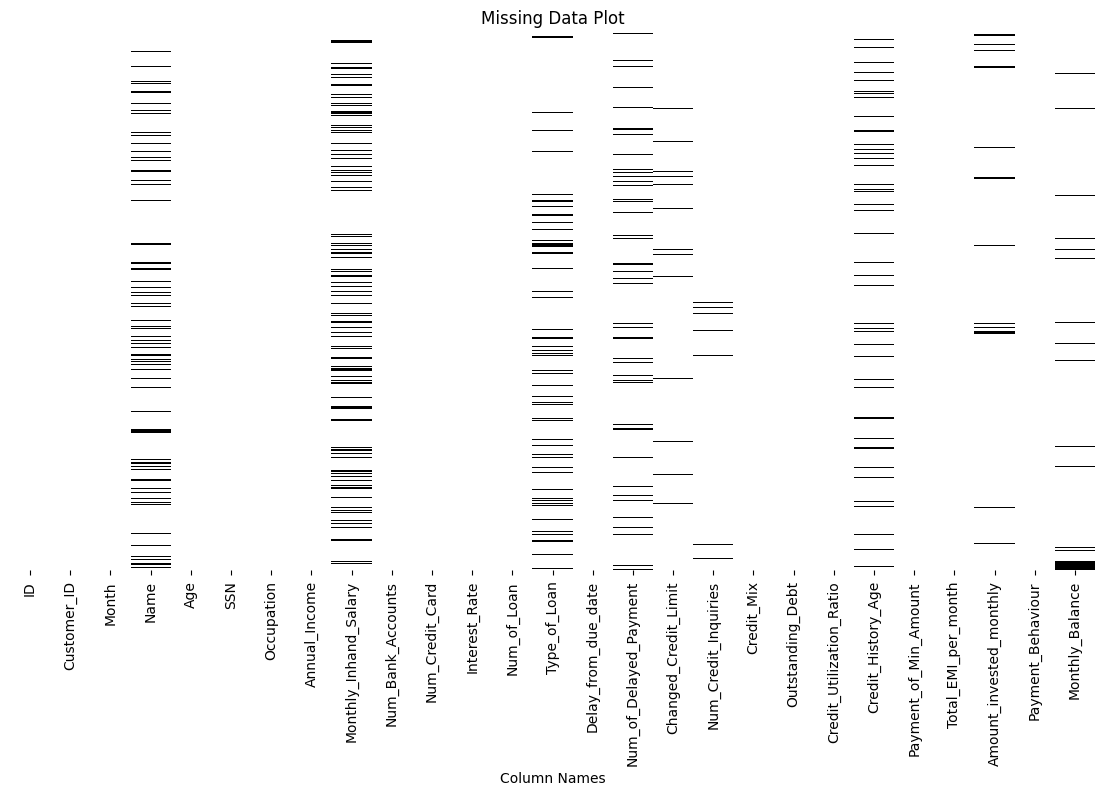

In [ ]:
# to show missing values as a plot
cmap1 = LinearSegmentedColormap.from_list('white_black', ['white', 'black'], N=256)

missing = df.isnull()

fig, ax = plt.subplots(figsize=(14, 7))

# Set the background color for the axis
ax.set_facecolor('#ADD8E1')

sns.heatmap(missing, cbar=False, yticklabels=False, cmap=cmap1, ax=ax)

ax.set_yticks([])
ax.set_xlabel('Column Names')
ax.set_title('Missing Data Plot')

plt.show()

Out of 27 columns, 9 columns have missing values.

In [ ]:
df.isnull().sum()/len(df)*100

,0
ID,0.000
Customer_ID,0.000
Month,0.000
Name,9.985
Age,0.000
SSN,0.000
Occupation,0.000
Annual_Income,0.000
Monthly_Inhand_Salary,15.002
Num_Bank_Accounts,0.000


Missing values are as many as 15% of dataset in monthly_salary_column and 11%, 9% etc in other columns.

### Treating Missing Values

In [ ]:
# creating function to treat missing values based on mode
def fillna_common(df, group_name,col_name):
  common_name = df.groupby(group_name)[col_name].transform(lambda x: x.mode()[0] if not x.mode().empty else pd.NA)
  return df[col_name].fillna(common_name)

In [ ]:
# applying function to missing value columns

df['Name']=fillna_common(df,'Customer_ID','Name')
df['Monthly_Inhand_Salary']=fillna_common(df,'Customer_ID','Monthly_Inhand_Salary')
df['Type_of_Loan']=fillna_common(df,'Customer_ID','Type_of_Loan')
df['Type_of_Loan']=df['Type_of_Loan'].fillna('Unknown')
df['Changed_Credit_Limit']=fillna_common(df,'Customer_ID','Changed_Credit_Limit')
df['Num_Credit_Inquiries']=fillna_common(df,'Customer_ID','Num_Credit_Inquiries')
df['Num_Credit_Inquiries']=df['Num_Credit_Inquiries'].astype('int64')
df['Credit_History_Age']=fillna_common(df,'Customer_ID','Credit_History_Age')

In [ ]:
# Treating missing values based on previous and next rows
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(method='ffill'))
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(method='bfill'))


As num of delayed payments can be different from mode, I used last or previous month delayed payments to fill missing values

In [ ]:
# Treating missing values based on Mean Values
df['Amount_invested_monthly']=df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(x.mean()))
df['Monthly_Balance']=df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.fillna(x.mean()))
df['Monthly_Balance']=df['Monthly_Balance'].fillna(0)

As monthly balance and amount invested monthly cant be filled using mode values as they changed regularly, treating them on the basis of mean values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

### Checking Duplicate Rows

In [ ]:
df.duplicated().sum()

0

- There are 100000 rows in the dataset with 27 columns.
- There are so much null values in the 9 columns of dataset which are cleaned and filled.
- No duplicate rows are there.


# *STATISTICAL SUMMARY*

In [ ]:
df.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,4.500000,110.649700,1.764157e+05,4198.350924,17.091280,22.47443,72.466040,3.009960,21.068780,30.690700,10.389023,27.321050,1426.220376,32.285173,1403.118217,637.569686,-3.000000e+22
std,2.291299,686.244717,1.429618e+06,3187.402015,117.404834,129.05741,466.422621,62.647879,14.860104,224.881705,6.783585,191.295174,1155.129026,5.116875,8306.041270,2004.193171,3.162151e+24
min,1.000000,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,2.750000,24.000000,1.945750e+04,1626.761667,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.340000,3.000000,566.072500,28.052567,30.306660,76.057014,2.668934e+02
50%,4.500000,33.000000,3.757861e+04,3095.978333,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,138.495050,3.341106e+02
75%,6.250000,42.000000,7.279092e+04,5961.637500,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.850000,9.000000,1945.962500,36.496663,161.224249,274.671232,4.674812e+02
max,8.000000,8698.000000,2.419806e+07,15204.633330,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


- Data is given for 8 months time period from January to August.
- Age column has min age as -500 and maximum as 8698 showing data entry errors.
- Annual Income has very high value like 24 billion, mean value is very different from median, showing presence of outliers.
- Monthly inhand salary is min 303 and max 15204, which tells more about annual income erroenous entry or outlier.
- In number of bank accounts the max is given as 1798 while lowest is -1, which again shows errors.
- Same goes for number of credit cards, interest rate, num of loan , num of delayed payment, num of credit enquiries etc.
- Delay from due date have almost same median and mean values with min as -5 which I am assuming it to be payment before due date and 67 as max no of delays on an average.
- Changed credit limit percent is positive means getting as max as 36 % hike in a month to negative as well as decreasing 6% too.
- Outstanding debt is min 0 and max 5000 per month.
- Credit utilization ratio is min 20% and max 50%, with similar mean and median showing clean feature with no outliers and errors.
- Amount invested Monthly is as low as 0 and high as 10000 which again indicates errors or outliers.
- Montly balance shows very highly negative balance which must be an error and high difference in mean and median indicates outliers too.

In [ ]:
df.describe(include='object')


,ID,Customer_ID,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,12500,10139,12501,16,6261,4,404,3,7
top,0x1602,CUS_0xd40,Langep,#F%$D@*&8,_______,Unknown,Standard,15 Years and 10 Months,Yes,Low_spent_Small_value_payments
freq,1,8,48,5572,7062,11408,36479,722,52326,25513


- ID is the primary key of data.
- customer_id feature shows there are 12500 customers data given with almost 8 entry for each customer for 8 months.
- SSN - Social Security Number have some erroneous values too.
- The customers belongs to 16 different occupation with some error datapoints too.
- Type of loan are unknown for 11k + datapoints.
- credit mix is standard for most of the customers.
- credit history is near to 15 for most customers.
- paymnent of min  amount is done by almost more than half of customers or half of time by all.
- Most common payment pbehavior is low spent and small value payments showing either low salary people data or high saving behaviour.

# *EXPLORATORY DATA ANALYSIS*

In [ ]:
# @title Month
df['Month'].value_counts()

,count
Month,
1,12500
2,12500
3,12500
4,12500
5,12500
6,12500
7,12500
8,12500


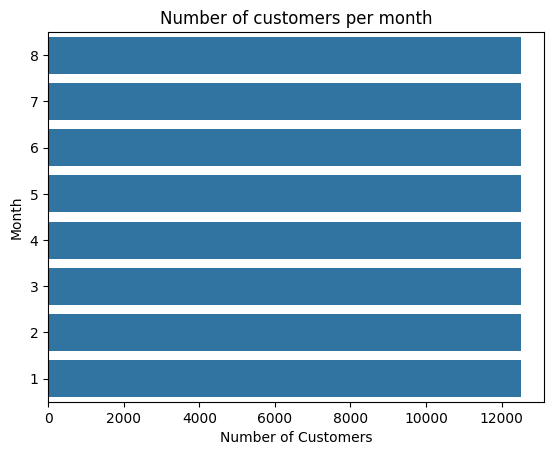

In [ ]:
month_cnt=df.groupby('Month')['Customer_ID'].nunique().reset_index()
plt.title('Number of customers per month')
sns.barplot(y=month_cnt['Month'],x=month_cnt['Customer_ID'],orient='h')
plt.xlabel('Number of Customers')
plt.gca().invert_yaxis()
plt.show()

- All months having similar data entries or we can say each 12500 customer details given for each month.

In [ ]:
# @title Age
df['Age'].value_counts().tail()

,count
Age,
1908,1
4583,1
7549,1
3119,1
1342,1


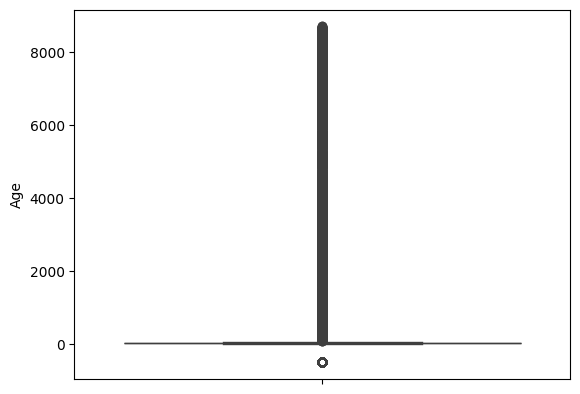

In [ ]:
# Checking Outliers
sns.boxplot(df['Age'])
plt.show()

In [ ]:
# function to clean errors
def clean_data(df,col_name,value1,value2):
  clean_data=df.groupby(['Customer_ID'])[col_name].transform(lambda x:x.mode()[0])
  df[col_name] = df.apply(lambda row: clean_data[row.name] if (row[col_name] > value1) or (row[col_name]<value2) else row[col_name], axis=1)
  return df[col_name]

In [ ]:
# cleaning column
df['Age']=clean_data(df,'Age',90,0)
unique_age=df.drop_duplicates(subset=['Customer_ID','Age'])
unique_age['Age'].value_counts().sort_index().tail()

,count
Age,
52,269
53,275
54,268
55,269
56,93


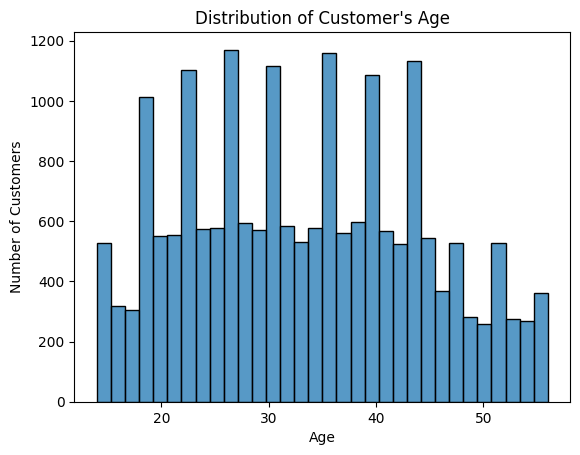

In [ ]:
plt.title("Distribution of Customer's Age")
sns.histplot(unique_age['Age'])
plt.ylabel('Number of Customers')
plt.show()

- Min customer Age is 14 years and max it is 56 after cleaning data. The customer age is varying to various ranges.

In [ ]:
# @title Annual Income
df['Annual_Income'].min(),df['Annual_Income'].max()

(7005.93, 24198062.0)

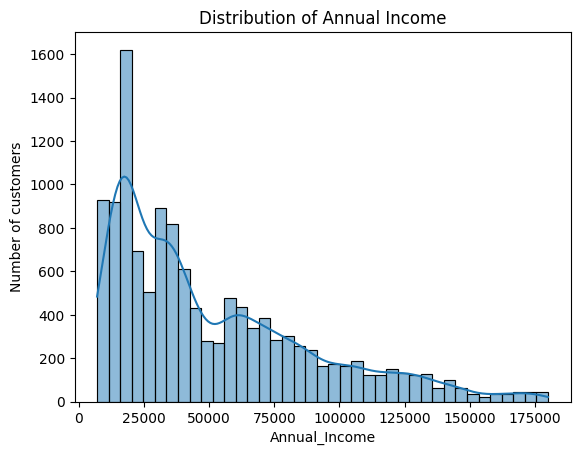

In [ ]:
# cleaning extreme values and visualising Income distribution
df['Annual_Income']=clean_data(df,'Annual_Income',200000,0)
unique_income=df.drop_duplicates(subset=['Customer_ID','Annual_Income'])

plt.title('Distribution of Annual Income')
sns.histplot(unique_income['Annual_Income'],kde=True)
plt.ylabel('Number of customers')
plt.show()

- Mostlt customers are low income customers with annual income of less than 50000.
- There are some outliers too on the positive side with some high annual income customers too.

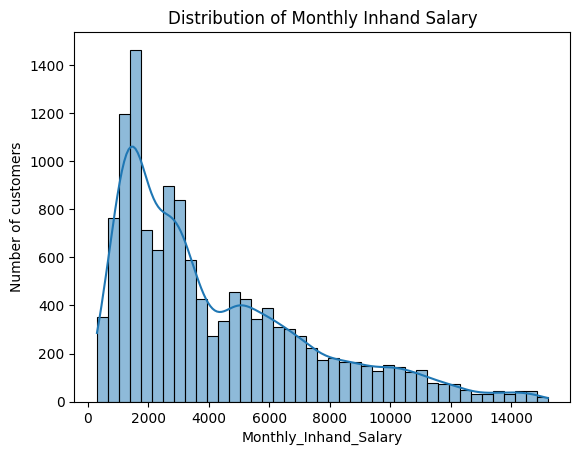

In [ ]:
# @title Monthly Inhand Salary
unique_salary=df.drop_duplicates(subset=['Customer_ID','Monthly_Inhand_Salary'])

plt.title('Distribution of Monthly Inhand Salary')
sns.histplot(unique_salary['Monthly_Inhand_Salary'],kde=True)
plt.ylabel('Number of customers')
plt.show()

- The customers with low monthly salary i.e., less than 5000 are more in the data and very less towards high monthly salary.

In [ ]:
# @title Number of Bank Accounts

df['Num_Bank_Accounts'].value_counts().sort_index().head()

,count
Num_Bank_Accounts,
-1,21
0,4328
1,4490
2,4304
3,11950


In [ ]:
# cleaning column error points

df['Num_Bank_Accounts']=clean_data(df,'Num_Bank_Accounts',12,0)
pos_accnt_num=df.groupby(['Customer_ID'])['Num_Bank_Accounts'].transform(lambda x:x.max())
df['Num_Bank_Accounts'] = df.apply(lambda row: pos_accnt_num[row.name] if row['Num_Bank_Accounts'] <0 else row['Num_Bank_Accounts'], axis=1)
bank_acnt=df.drop_duplicates(subset=['Customer_ID','Num_Bank_Accounts'])
bank_acnt['Num_Bank_Accounts'].value_counts().sort_index()

,count
Num_Bank_Accounts,
0,563
1,586
2,570
3,1538
4,1585
5,1578
6,1687
7,1666
8,1647


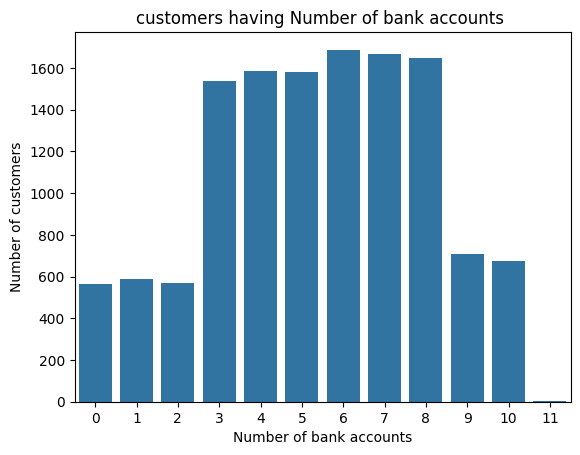

In [ ]:
acnt_value=bank_acnt['Num_Bank_Accounts'].value_counts().sort_index().reset_index()
plt.title('customers having Number of bank accounts ')
sns.barplot(y=acnt_value['count'],x=acnt_value['Num_Bank_Accounts'])
plt.xlabel('Number of bank accounts')
plt.ylabel('Number of customers')
plt.show()

- Most customers have bank account mostly from 3 to 8, some are having less and high as 10,11.
- Almost 500+ customers dont even have a single bank account which is quite surprising in this digital age.

In [ ]:
# @title Number of credit card
df['Num_Credit_Card'].value_counts().sort_index().tail()

,count
Num_Credit_Card,
1495,1
1496,2
1497,3
1498,3
1499,2


In [ ]:
# cleaning data

df['Num_Credit_Card'] = clean_data(df,'Num_Credit_Card',12,0)
cc_num=df.drop_duplicates(subset=['Customer_ID','Num_Credit_Card'])
cc_num['Num_Credit_Card'].value_counts().sort_index()

,count
Num_Credit_Card,
0,4
1,277
2,289
3,1729
4,1850
5,2415
6,2168
7,2173
8,652


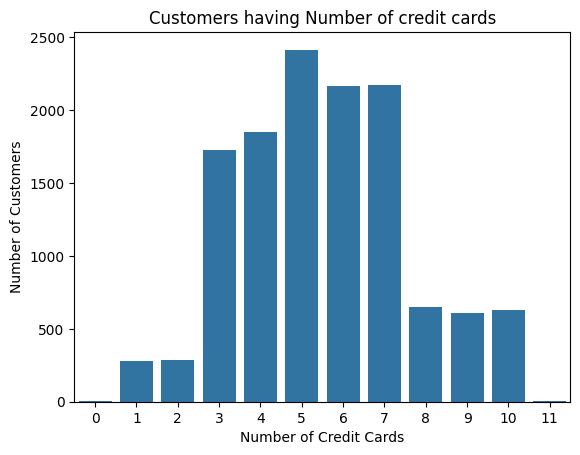

In [ ]:
cc_numbers=cc_num['Num_Credit_Card'].value_counts().sort_index().reset_index()
plt.title('Customers having Number of credit cards')
sns.barplot(y=cc_numbers['count'],x=cc_numbers['Num_Credit_Card'])
plt.ylabel('Number of Customers')
plt.xlabel('Number of Credit Cards')
plt.show()

- Mostly customers have 3 to 7 number of credit cards.
- Few having 1,2 and above 8 credit cards.

In [ ]:
# @title Interest Rate
df['Interest_Rate'].value_counts().sort_index().tail()

,count
Interest_Rate,
5775,1
5776,1
5788,1
5789,1
5797,1


In [ ]:
# cleaning data

df['Interest_Rate']=clean_data(df,'Interest_Rate',50,0)
ir_unique=df.drop_duplicates(subset=['Customer_ID','Interest_Rate'])
ir_unique['Interest_Rate'].value_counts().sort_index().head()

,count
Interest_Rate,
1,343
2,315
3,353
4,330
5,637


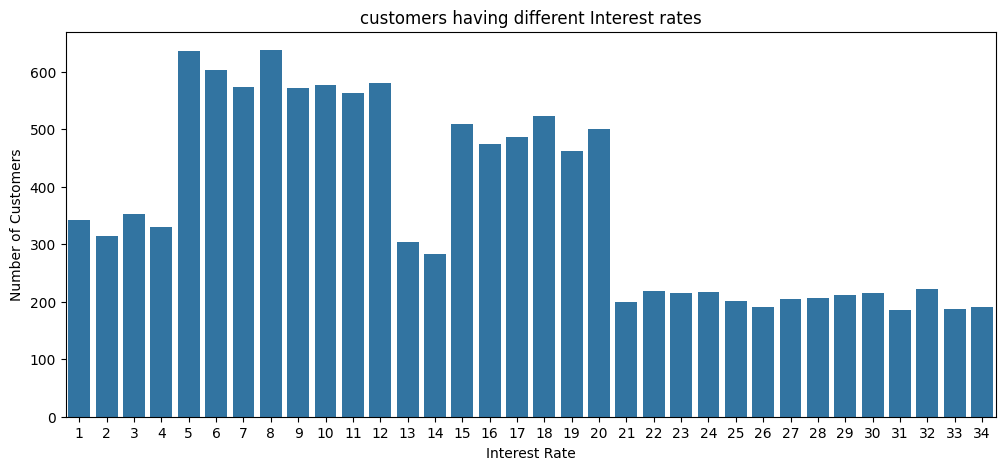

In [ ]:
int_rate=ir_unique['Interest_Rate'].value_counts().sort_index().reset_index()

plt.figure(figsize=(12,5))
plt.title('customers having different Interest rates')
sns.barplot(y=int_rate['count'],x=int_rate['Interest_Rate'])
plt.ylabel('Number of Customers')
plt.xlabel('Interest Rate')
plt.show()

- Interest Rate is below 20% for most of the customers while it is upto 34 for some of them.

In [ ]:
# @title Number of Loan
df['Num_of_Loan'].value_counts().sort_index().tail()

,count
Num_of_Loan,
1482,1
1484,1
1485,1
1495,1
1496,1


In [ ]:
# cleaning data
df['Num_of_Loan']=clean_data(df,'Num_of_Loan',10,0)
loan_no=df.drop_duplicates(subset=['Customer_ID','Num_of_Loan'])
loan_no['Num_of_Loan'].value_counts().sort_index().head()

,count
Num_of_Loan,
0,1426
1,1391
2,1964
3,1969
4,1932


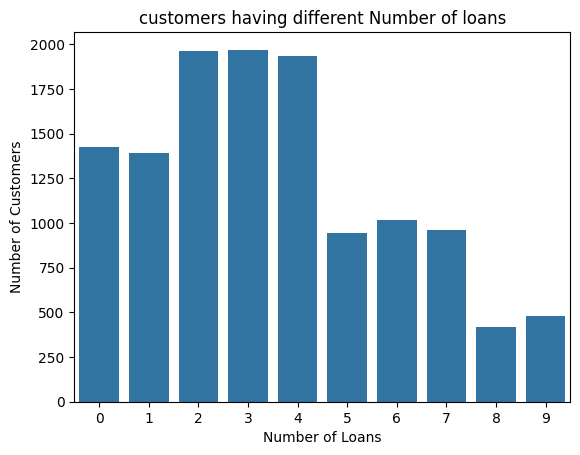

In [ ]:
loan_viz=loan_no['Num_of_Loan'].value_counts().sort_index().reset_index()
plt.title('customers having different Number of loans')
sns.barplot(y=loan_viz['count'],x=loan_viz['Num_of_Loan'])
plt.xlabel('Number of Loans')
plt.ylabel('Number of Customers')
plt.show()

- Almost customers have loans less than 4 while some take loans for more than 5 and upto 9 too.

In [ ]:
# @title Delay from due date

delay_unique=df.drop_duplicates(subset=['Customer_ID','Delay_from_due_date'])
delay_unique['Delay_from_due_date'].value_counts().sort_index().tail()

,count
Delay_from_due_date,
63,63
64,57
65,48
66,29
67,20


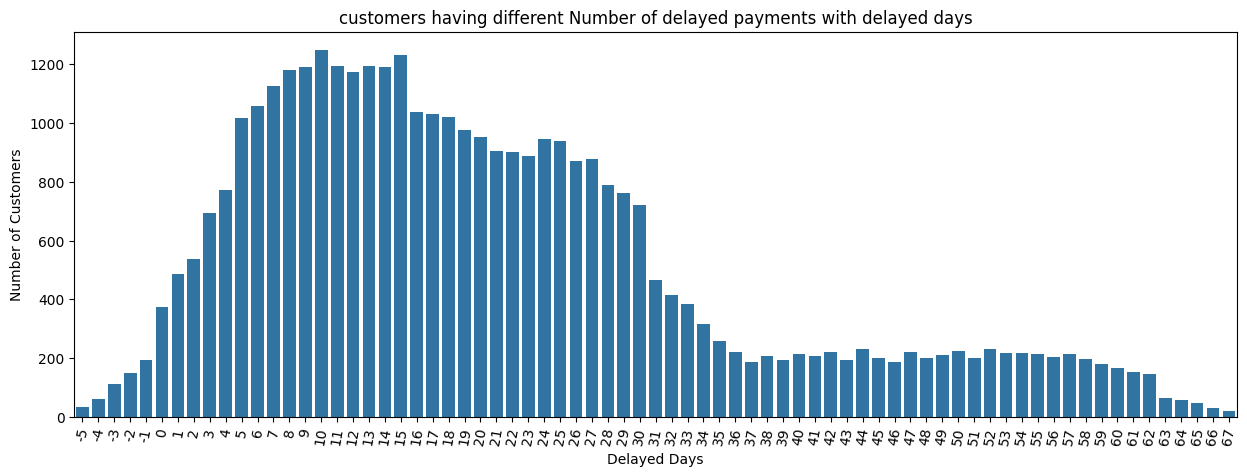

In [ ]:
delay_dd=delay_unique['Delay_from_due_date'].value_counts().sort_index().reset_index()
plt.figure(figsize=(15,5))
plt.title('customers having different Number of delayed payments with delayed days')
sns.barplot(y=delay_dd['count'],x=delay_dd['Delay_from_due_date'])
plt.xlabel('Delayed Days')
plt.ylabel('Number of Customers')
plt.xticks(rotation=80)
plt.show()

- There are some customers who used to pay early for their dues.
- while almost 95% + delayed their paymnets on an average till 30 days.
- some are even delaying paymnets upto 2 months plus.-

In [ ]:
# @title Number of Delayed Payment

df['Num_of_Delayed_Payment'].value_counts().sort_index().tail()

,count
Num_of_Delayed_Payment,
4344.0,1
4360.0,1
4384.0,1
4388.0,1
4397.0,2


In [ ]:
df['Num_of_Delayed_Payment'].value_counts().sort_index().head()

,count
Num_of_Delayed_Payment,
-3.0,99
-2.0,254
-1.0,335
0.0,1735
1.0,1773


Checking Outliers

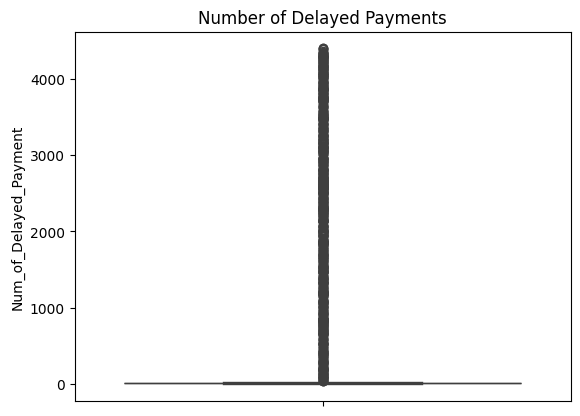

In [ ]:
plt.title('Number of Delayed Payments')
sns.boxplot(df['Num_of_Delayed_Payment'])
plt.show()

Treating Outliers

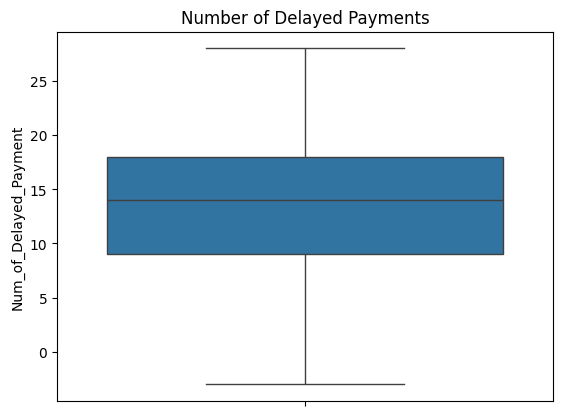

In [ ]:
df['Num_of_Delayed_Payment']=np.clip(df['Num_of_Delayed_Payment'],np.percentile(df['Num_of_Delayed_Payment'],0),np.percentile(df['Num_of_Delayed_Payment'],99.2))

plt.title('Number of Delayed Payments')
sns.boxplot(df['Num_of_Delayed_Payment'])
plt.show()

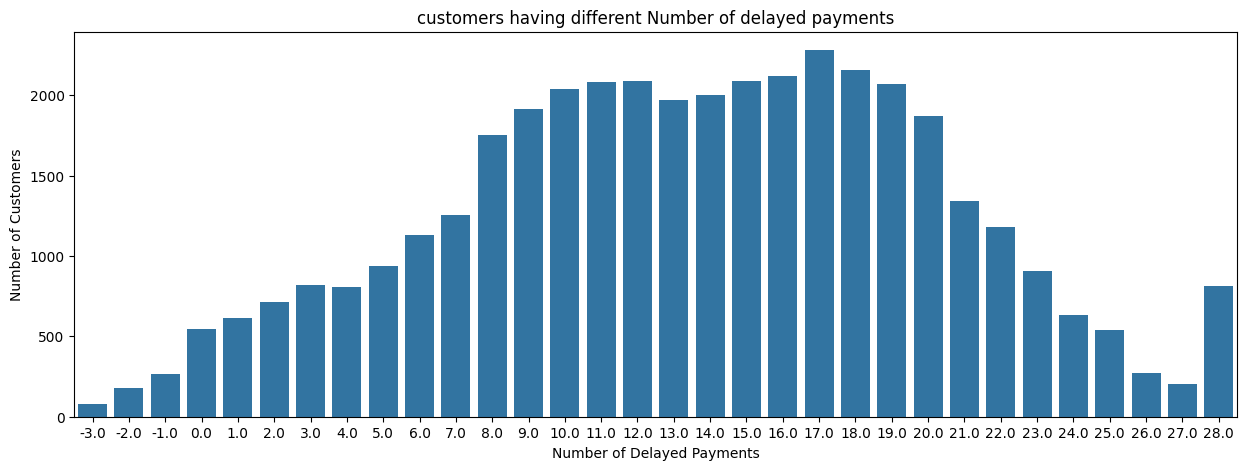

In [ ]:
delay_paymnt=df.drop_duplicates(subset=['Customer_ID','Num_of_Delayed_Payment'])
dly_pymnts=delay_paymnt['Num_of_Delayed_Payment'].value_counts().sort_index().reset_index()
plt.figure(figsize=(15,5))
plt.title('customers having different Number of delayed payments')
sns.barplot(y=dly_pymnts['count'],x=dly_pymnts['Num_of_Delayed_Payment'])
plt.xlabel('Number of Delayed Payments')
plt.ylabel('Number of Customers')
plt.show()

- After removing outliers, we can see that some customers havenot even delayed payments.
- Assuming negative no of delay payments as early payments.
- Most of the customers are delaying their payments on an average 8 to 20 times which is not a good indicator for sure.

In [ ]:
# @title Changed Credit Limit
df['Changed_Credit_Limit'].value_counts().sort_index().head()

,count
Changed_Credit_Limit,
-6.49,1
-6.48,1
-6.45,1
-6.44,2
-6.43,2


In [ ]:
df['Changed_Credit_Limit'].value_counts().sort_index().tail()

,count
Changed_Credit_Limit,
35.98,1
36.09,1
36.29,1
36.49,1
36.97,1


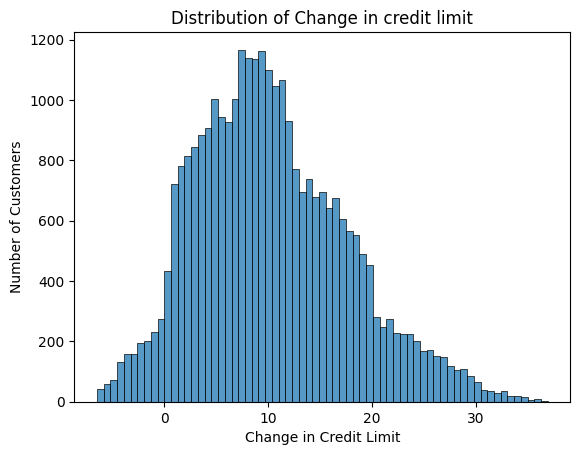

In [ ]:
ccl=df.drop_duplicates(subset=['Customer_ID','Changed_Credit_Limit'])

plt.title('Distribution of Change in credit limit')
sns.histplot(ccl['Changed_Credit_Limit'])
plt.xlabel('Change in Credit Limit')
plt.ylabel('Number of Customers')
plt.show()

The credit limit is increasing on an average from 5 to 30 percent, which makes sense too as there are many delay payments and for high tenures too.

In [ ]:
# @title Number of Credit Inquiries
df['Num_Credit_Inquiries'].value_counts().sort_index().tail()

,count
Num_Credit_Inquiries,
2588,1
2589,2
2592,2
2594,1
2597,1


In [ ]:
# cleaning data

df['Num_Credit_Inquiries']=clean_data(df,'Num_Credit_Inquiries',20,0)
nci=df.drop_duplicates(subset=['Customer_ID','Num_Credit_Inquiries'])
nci['Num_Credit_Inquiries'].value_counts().sort_index()

,count
Num_Credit_Inquiries,
0,1265
1,1422
2,1566
3,1701
4,2228
5,1257
6,1647
7,1637
8,1589


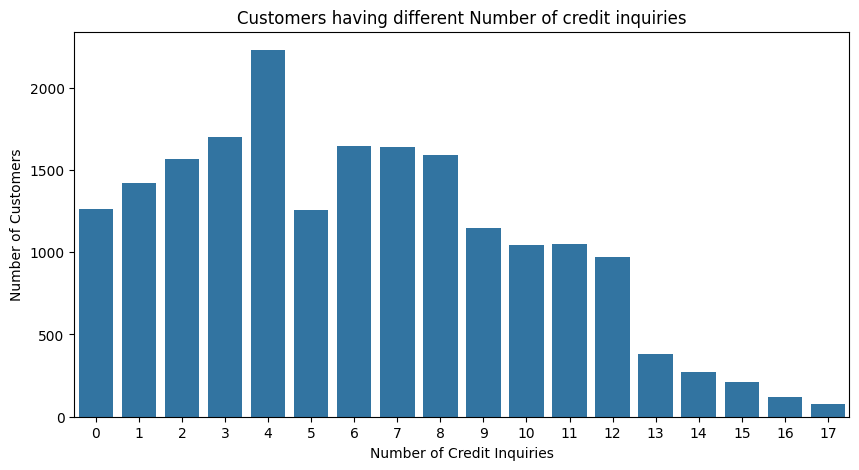

In [ ]:
cc_enq=nci['Num_Credit_Inquiries'].value_counts().sort_index().reset_index()
plt.figure(figsize=(10,5))
plt.title('Customers having different Number of credit inquiries')
sns.barplot(y=cc_enq['count'],x=cc_enq['Num_Credit_Inquiries'])
plt.xlabel('Number of Credit Inquiries')
plt.ylabel('Number of Customers')
plt.show()

- We can see the customers have credit enquiry less than 12 for most of the data set but there are some unique customers too who hava as high as 17 credit enquiries.

In [ ]:
# @title Outstanding Debt
df['Outstanding_Debt'].value_counts().tail()

,count
Outstanding_Debt,
4230.04,8
641.99,8
98.61,8
2614.48,8
502.38,8


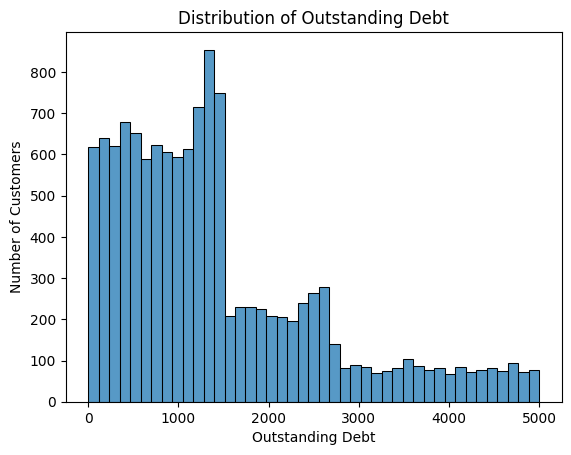

In [ ]:
out_debt=df.drop_duplicates(subset=['Customer_ID','Outstanding_Debt'])

plt.title('Distribution of Outstanding Debt')
sns.histplot(out_debt['Outstanding_Debt'])
plt.xlabel('Outstanding Debt')
plt.ylabel('Number of Customers')
plt.show()

- As we have less salary customers our outstanding debt is following same distribution with having less outstanding debt.
- But their are some customers too who have upto 5000 oustanding debt too.

In [ ]:
# @title Credit Utilization Ratio

df['Credit_Utilization_Ratio'].value_counts().head()

,count
Credit_Utilization_Ratio,
26.407909,2
33.163023,2
26.822620,1
30.462162,1
33.933755,1


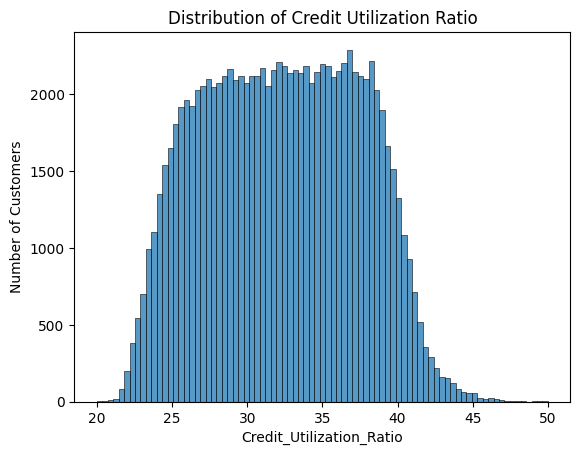

In [ ]:
cur=df.drop_duplicates(subset=['Customer_ID','Credit_Utilization_Ratio'])

plt.title('Distribution of Credit Utilization Ratio')
sns.histplot(cur['Credit_Utilization_Ratio'])
plt.ylabel('Number of Customers')
plt.show()

- Credit Utilization ratio is following a normal distribution with range of 20-45 with some having high utilization as upto 50 too.

In [ ]:
# @title Total EMI per month
df['Total_EMI_per_month'].value_counts().sort_index().tail()

,count
Total_EMI_per_month,
82193.0,1
82204.0,1
82236.0,1
82256.0,1
82331.0,1


In [ ]:
# cleaning data
df['Total_EMI_per_month']=clean_data(df,'Total_EMI_per_month',1600,0)
df['Total_EMI_per_month'].value_counts().sort_index().tail()

,count
Total_EMI_per_month,
1642.825388,7
1645.529388,7
1679.017067,5
1701.955013,7
1779.103254,5


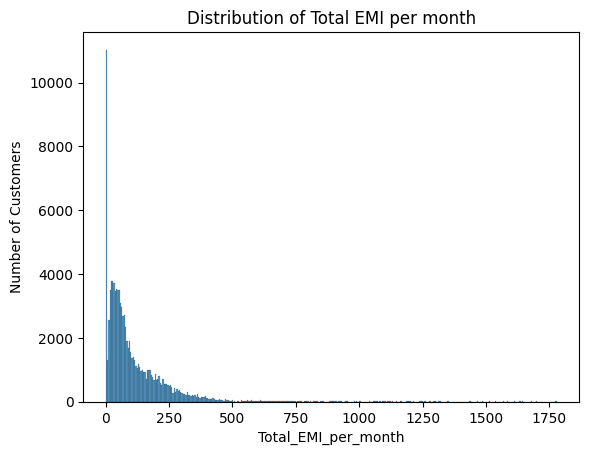

In [ ]:
plt.title('Distribution of Total EMI per month')
sns.histplot(df['Total_EMI_per_month'])
plt.ylabel('Number of Customers')
plt.show()

- Total emi is less too for most of customers as less salaried customers data with outliers too on towards high emi per month.

In [ ]:
# @title Amount Invested Monthly
df['Amount_invested_monthly'].value_counts().sort_index().tail()

,count
Amount_invested_monthly,
4434.186846,1
4452.086988,1
4486.467700,1
5748.505316,1
10000.000000,4305


Checking outliers

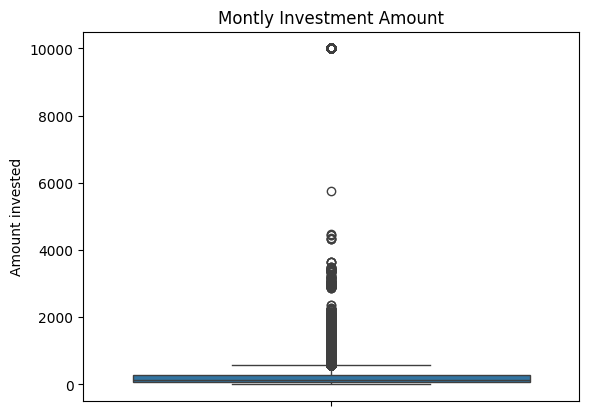

In [ ]:
plt.title('Montly Investment Amount')
sns.boxplot(df['Amount_invested_monthly'])
plt.ylabel('Amount invested')
plt.show()

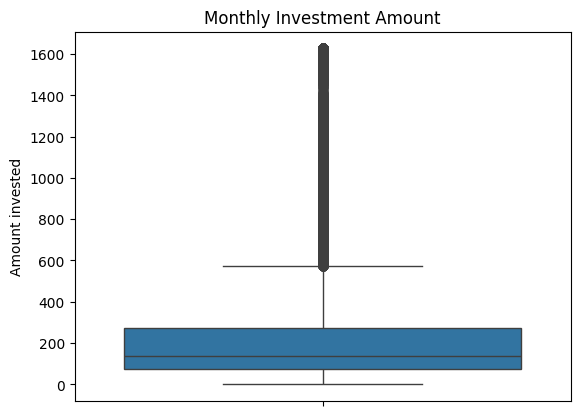

In [ ]:
# Treating outliers
df['Amount_invested_monthly']=np.clip(df['Amount_invested_monthly'],0,np.percentile(df['Amount_invested_monthly'],95))

plt.title('Monthly Investment Amount')
sns.boxplot(df['Amount_invested_monthly'])
plt.ylabel('Amount invested')
plt.show()

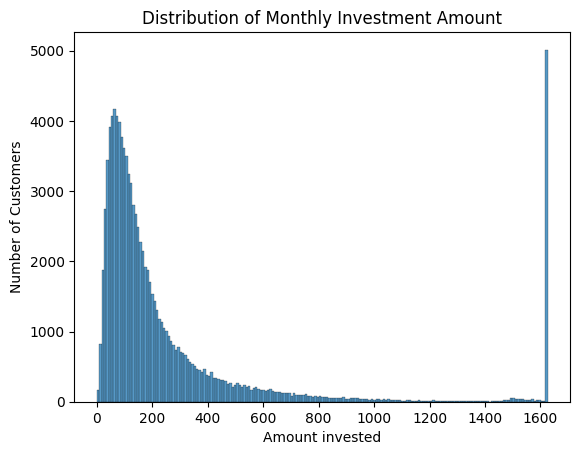

In [ ]:
plt.title('Distribution of Monthly Investment Amount')
sns.histplot(df['Amount_invested_monthly'])
plt.xlabel('Amount invested')
plt.ylabel('Number of Customers')
plt.show()

- The monthly amount invested is below 400 for most of the customers while it is showinh high on 1600 due to outliers clipping.

In [ ]:
# @title Monthly Balance
df['Monthly_Balance'].value_counts().sort_index().head()

,count
Monthly_Balance,
-3.333333e+26,9
0.000000e+00,1696
7.759665e-03,1
8.862787e-02,1
9.548250e-02,1


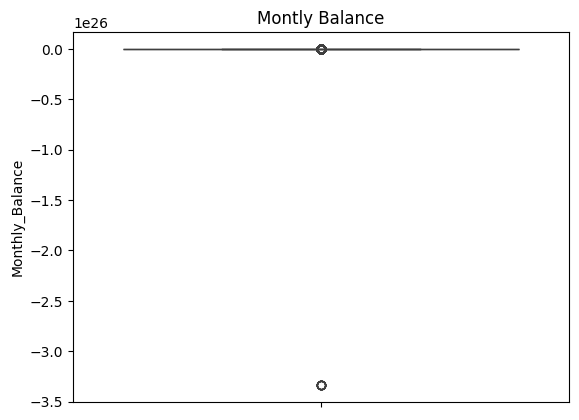

In [ ]:
# Checking Outliers

plt.title('Montly Balance')
sns.boxplot(df['Monthly_Balance'])
plt.show()

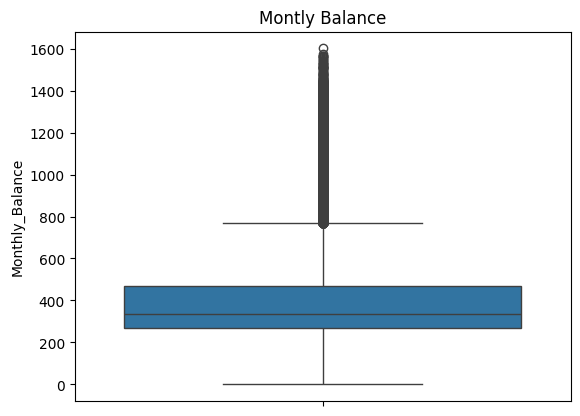

In [ ]:
# Treating Outliers

df['Monthly_Balance']=np.clip(df['Monthly_Balance'],0,np.percentile(df['Monthly_Balance'],100))
plt.title('Montly Balance')
sns.boxplot(df['Monthly_Balance'])
plt.show()

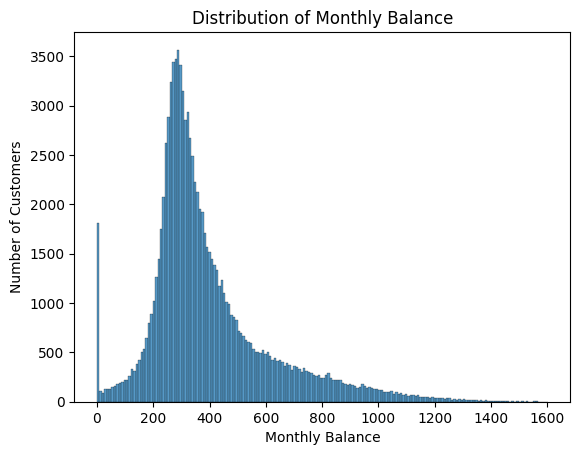

In [ ]:
plt.title('Distribution of Monthly Balance')
sns.histplot(df['Monthly_Balance'])
plt.xlabel('Monthly Balance')
plt.ylabel('Number of Customers')
plt.show()

- Monthly balance is in the range of 200-600.
- with some outliers towards positive and negative side.
- The numbers towards 0 are high due to clipping nehative balance datapoints.

In [ ]:
# @title SSN
df['SSN'].describe()

,SSN
count,100000
unique,12501
top,#F%$D@*&8
freq,5572


In [ ]:
def fillna_common(df, group_name,col_name):
  common_name = df.groupby(group_name)[col_name].transform(lambda x: x.mode()[0] if not x.mode().empty else pd.NA)
  return df[col_name].fillna(common_name)

In [ ]:
def clean_col(df,col_name):
  col_mode=df.groupby(['Customer_ID'])[col_name].transform(lambda x:x.mode()[0])
  return df[col_name].fillna(col_mode)

In [ ]:
df['SSN']=df['SSN'].replace('#F%$D@*&8',np.nan)
df['SSN']=clean_col(df,'SSN')
df['SSN'].describe()

,SSN
count,100000
unique,12500
top,821-00-0265
freq,8


In [ ]:
# @title Occupation
df['Occupation'].describe()

,Occupation
count,100000
unique,16
top,_______
freq,7062


In [ ]:
df['Occupation']=df['Occupation'].replace('_______',np.nan)
df['Occupation']=clean_col(df,'Occupation')
df['Occupation'].value_counts()

,count
Occupation,
Lawyer,7096
Engineer,6864
Architect,6824
Mechanic,6776
Scientist,6744
Accountant,6744
Developer,6720
Media_Manager,6720
Teacher,6672


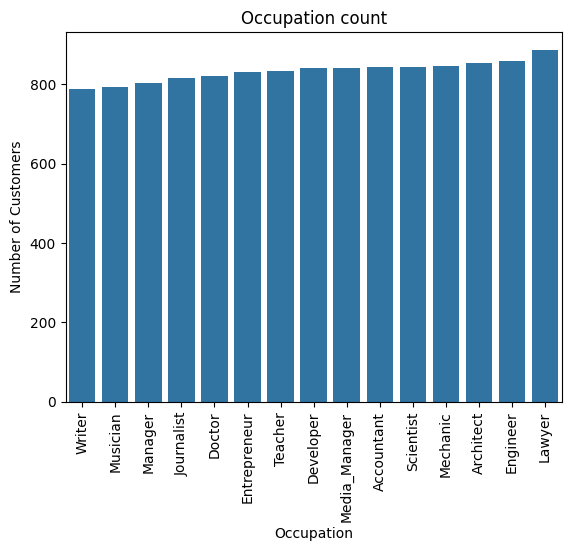

In [ ]:
occupation_count=df.groupby(['Occupation'])['Customer_ID'].nunique().sort_values().reset_index()
plt.title('Occupation count')
sns.barplot(x=occupation_count['Occupation'],y=occupation_count['Customer_ID'])
plt.xticks(rotation=90)
plt.ylabel('Number of Customers')
plt.show()

- In the dataset 7096 customers are Lawyer while 6304 Writers.
- we have customers from 16 different occupations

In [ ]:
# @title Type of Loan
df['Type_of_Loan'].value_counts().tail()

,count
Type_of_Loan,
"Not Specified, Mortgage Loan, Auto Loan, and Payday Loan",8
"Payday Loan, Mortgage Loan, Debt Consolidation Loan, and Student Loan",8
"Debt Consolidation Loan, Auto Loan, Personal Loan, Debt Consolidation Loan, Student Loan, and Credit-Builder Loan",8
"Student Loan, Auto Loan, Student Loan, Credit-Builder Loan, Home Equity Loan, Debt Consolidation Loan, and Debt Consolidation Loan",8
"Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan",8


In [ ]:
# Cleaning Feature
df['Type_of_Loan']=df['Type_of_Loan'].str.split(', and |,')
df['Type_of_Loan']=df['Type_of_Loan'].apply(lambda x: [i.strip() for i in x])

In [ ]:
loans_type=set()
for i in df['Type_of_Loan']:
  for j in i:
    if j not in loans_type:
      loans_type.add(j)
loans_type


{'Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan',
 'Unknown'}

In [ ]:

# Function to count secured and unsecured loans
def count_loans(loans):
    secured_loans = ['Home Equity Loan', 'Mortgage Loan','Credit-Builder Loan','Auto Loan']
    unsecured_loans = ['Payday Loan', 'Student Loan','Personal Loan','Not Specified','Debt Consolidation Loan','Unknown']

    secured_count = sum(loan in secured_loans for loan in loans)
    unsecured_count = sum(loan in unsecured_loans for loan in loans)

    return {
        'Secured': secured_count,
        'Unsecured': unsecured_count
    }

In [ ]:
# Applying the function to the DataFrame

counts = df['Type_of_Loan'].apply(count_loans)
df[['Secured_Loan', 'Unsecured_Loan']] = pd.DataFrame(counts.tolist(), index=df.index)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Secured_Loan,Unsecured_Loan
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,3,1
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,3,1
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3,1
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3,1
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3,1


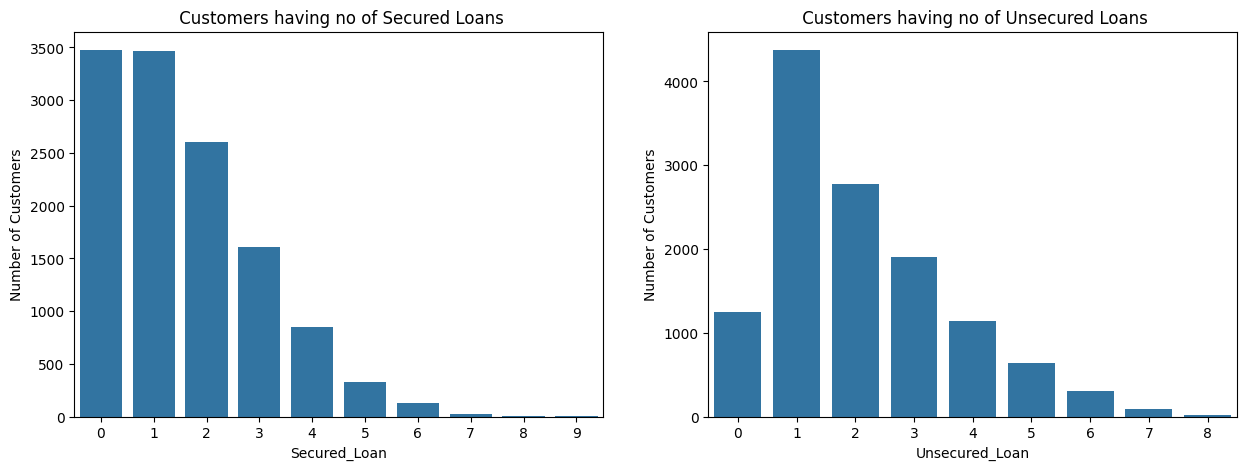

In [ ]:
# @title Secured and Unsecured Loans
count_sec=df.groupby(['Secured_Loan'])['Customer_ID'].nunique().reset_index()
count_unsec=df.groupby(['Unsecured_Loan'])['Customer_ID'].nunique().reset_index()

plt.subplots(figsize=(15,5))

plt.subplot(1,2,1)
plt.title(' Customers having no of Secured Loans')
sns.barplot(x=count_sec['Secured_Loan'],y=count_sec['Customer_ID'])
plt.ylabel('Number of Customers')

plt.subplot(1,2,2)
plt.title(' Customers having no of Unsecured Loans')
sns.barplot(x=count_unsec['Unsecured_Loan'],y=count_unsec['Customer_ID'])
plt.ylabel('Number of Customers')
plt.show()

- Distribution of Secured and Unsecured loans are almost same.

In [ ]:
# @title Credit Mix
df['Credit_Mix'].value_counts()

,count
Credit_Mix,
Standard,36479
Good,24337
_,20195
Bad,18989


In [ ]:
# Cleaning Data
df['Credit_Mix']=df['Credit_Mix'].replace('_',np.nan)
df['Credit_Mix']=clean_col(df,'Credit_Mix')
print(df['Credit_Mix'].value_counts())
print("*"*50)
# df['Credit_Mix']=df['Credit_Mix'].str.replace('_','Unknown')
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64
**************************************************


,count
Credit_Mix,
Standard,45848
Good,30384
Bad,23768


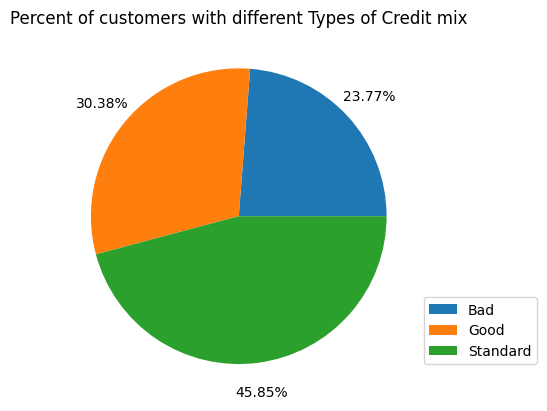

In [ ]:

Credit_Mix_count=df.groupby(['Credit_Mix'])['Customer_ID'].nunique().sort_values().reset_index()
plt.title('Percent of customers with different Types of Credit mix')
plt.pie(Credit_Mix_count['Customer_ID'],autopct='%1.2f%%',pctdistance=1.2)
plt.legend(Credit_Mix_count['Credit_Mix'],loc=[1,0.1])


plt.show()

- As analysed earlier the customers having standardised credit mix is 45%, whille good credit mix customers are 30 % and bad are 23 % approx.

In [ ]:
# @title Credit History Age
df['Credit_History_Age'].describe()

,Credit_History_Age
count,100000
unique,404
top,15 Years and 10 Months
freq,722


In [ ]:
# Converting years and months to numbers
import re

def convert_to_years(value):
    # Regular expression to extract years and months
    pattern = r'(\d+)\s*years?\s*(?:and\s*)?(\d+)\s*months?'
    match = re.match(pattern, value.strip().lower())

    if match:
        years = match.group(1)
        months = match.group(2)

        # Convert years and months to integers, default to 0 if not present
        years = int(years) if years else 0
        months = int(months) if months else 0

        # Convert months to years (assuming 12 months per year)
        total_years = years + months/12

        return np.round(total_years,2)
    else:
        raise ValueError(f"Invalid input format: {value}")
# Can also use split and then divide and combine

In [ ]:
df['Credit_History_Age']=df['Credit_History_Age'].apply(lambda x : convert_to_years(x))

In [ ]:
df['Credit_History_Age'].value_counts().sort_index().tail()

,count
Credit_History_Age,
33.33,133
33.42,89
33.50,46
33.58,14
33.67,12


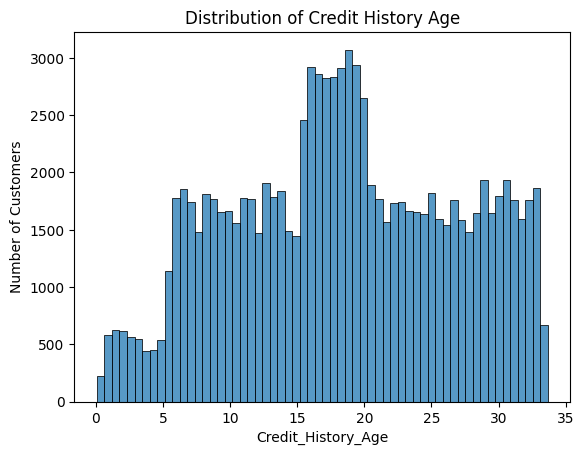

In [ ]:
plt.title('Distribution of Credit History Age')
sns.histplot(df['Credit_History_Age'])
plt.ylabel('Number of Customers')
plt.show()

- For most of the customers credit history age is 5 to 35 with highest 15-20.
- For some data points the credit history age is higher than the age of customer itself. So I am assuming that the credit history age is either not averaged or there is some error in data.


In [ ]:
# @title Payment of Minimum Amount
df['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


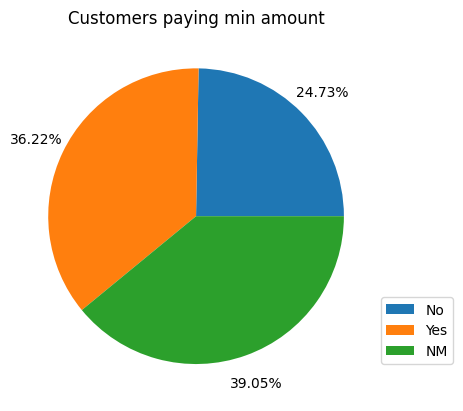

In [ ]:
Payment_of_Min_Amount_count=df.groupby(['Payment_of_Min_Amount'])['Customer_ID'].nunique().sort_values().reset_index()

plt.title('Customers paying min amount')
plt.pie(Payment_of_Min_Amount_count['Customer_ID'],autopct='%1.2f%%',pctdistance=1.2)
plt.legend(Payment_of_Min_Amount_count['Payment_of_Min_Amount'],loc=[1,0.1])
plt.show()

The 36% Customers are paying minimum payments, 25% are not even paying that and for 40% customers it is not mentioned even.

In [ ]:
# @title Payment Behaviour
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,25513
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425
!@9#%8,7600


In [ ]:
pymnt_behav_mode=df.groupby(['Customer_ID'])['Payment_Behaviour'].transform(lambda x:x.mode()[0])
df['Payment_Behaviour']=df['Payment_Behaviour'].replace('!@9#%8',np.nan)
df['Payment_Behaviour']=df['Payment_Behaviour'].fillna(pymnt_behav_mode)
df['Payment_Behaviour']=df['Payment_Behaviour'].str.replace('!@9#%8',"Unknown")
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,27489
High_spent_Medium_value_payments,18911
High_spent_Large_value_payments,14911
Low_spent_Medium_value_payments,14414
High_spent_Small_value_payments,11771
Low_spent_Large_value_payments,10768
Unknown,1736


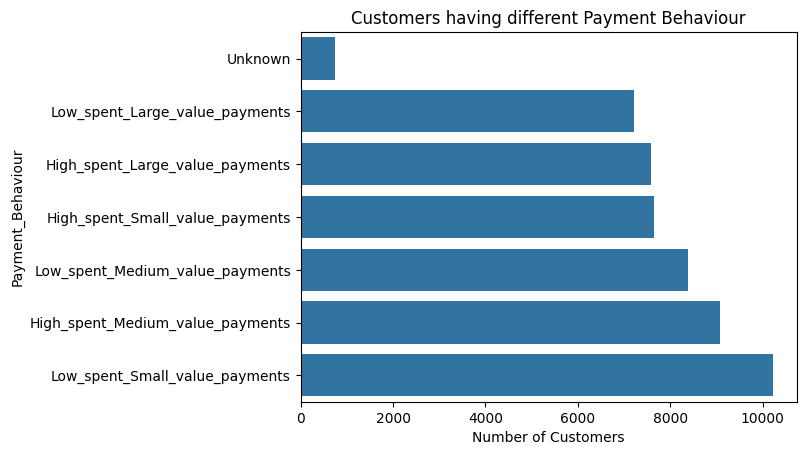

In [ ]:
Payment_Behaviour_count=df.groupby(['Payment_Behaviour'])['Customer_ID'].nunique().sort_values().reset_index()

plt.title('Customers having different Payment Behaviour')
sns.barplot(x=Payment_Behaviour_count['Customer_ID'],y=Payment_Behaviour_count['Payment_Behaviour'])
plt.xlabel('Number of Customers')
plt.show()

- Most customers are from Low spent small value payments which makes sense as low incone customers are more in datsaset.
- low spent large value payments are less but their thier are as we have high paymnt customers too.

# *MULTIVARIATE ANALYSIS*

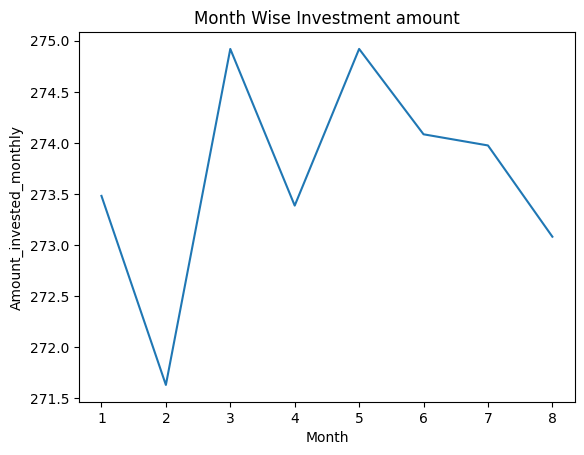

In [ ]:
plt.title('Month Wise Investment amount')
sns.lineplot(df.groupby('Month')['Amount_invested_monthly'].mean())
plt.show()

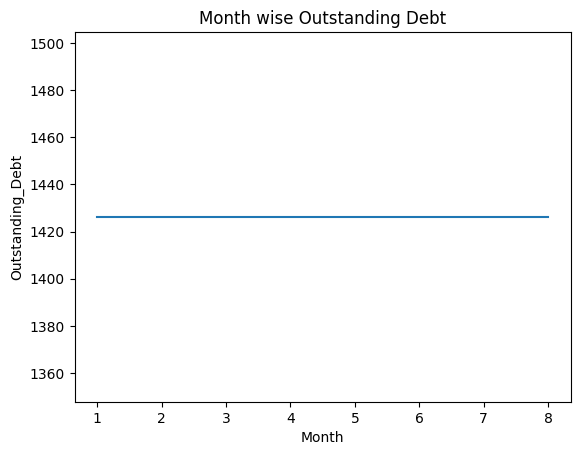

In [ ]:
plt.title('Month wise Outstanding Debt')
sns.lineplot(df.groupby('Month')['Outstanding_Debt'].mean())
plt.show()

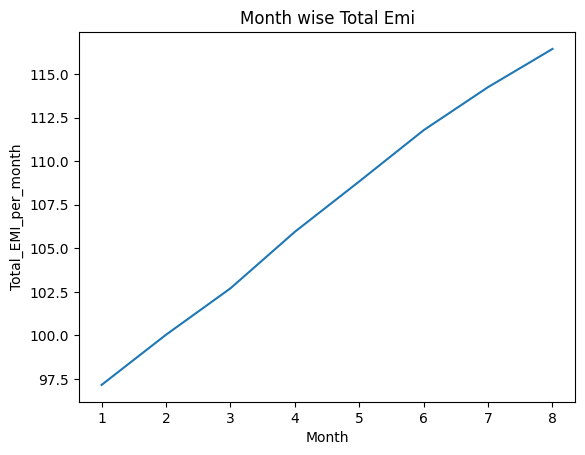

In [ ]:
plt.title('Month wise Total Emi')
sns.lineplot(df.groupby('Month')['Total_EMI_per_month'].mean())
plt.show()

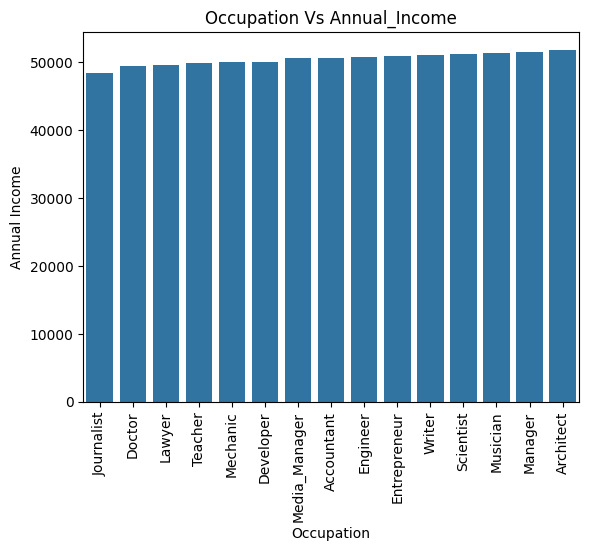

In [ ]:
occ_inc=df.groupby(['Occupation'])['Annual_Income'].mean().sort_values().reset_index()
plt.title('Occupation Vs Annual_Income')
sns.barplot(x=occ_inc['Occupation'],y=occ_inc['Annual_Income'])
plt.xticks(rotation=90)
plt.ylabel('Annual Income')
plt.show()

- Investments are high in months of March and May while least in February.
- Outstanding debt has no effect due to months.
- Total EMi is increasing with months means people are taking more loans with passing days.
- Occupation doesnot have much effect on the income of people.

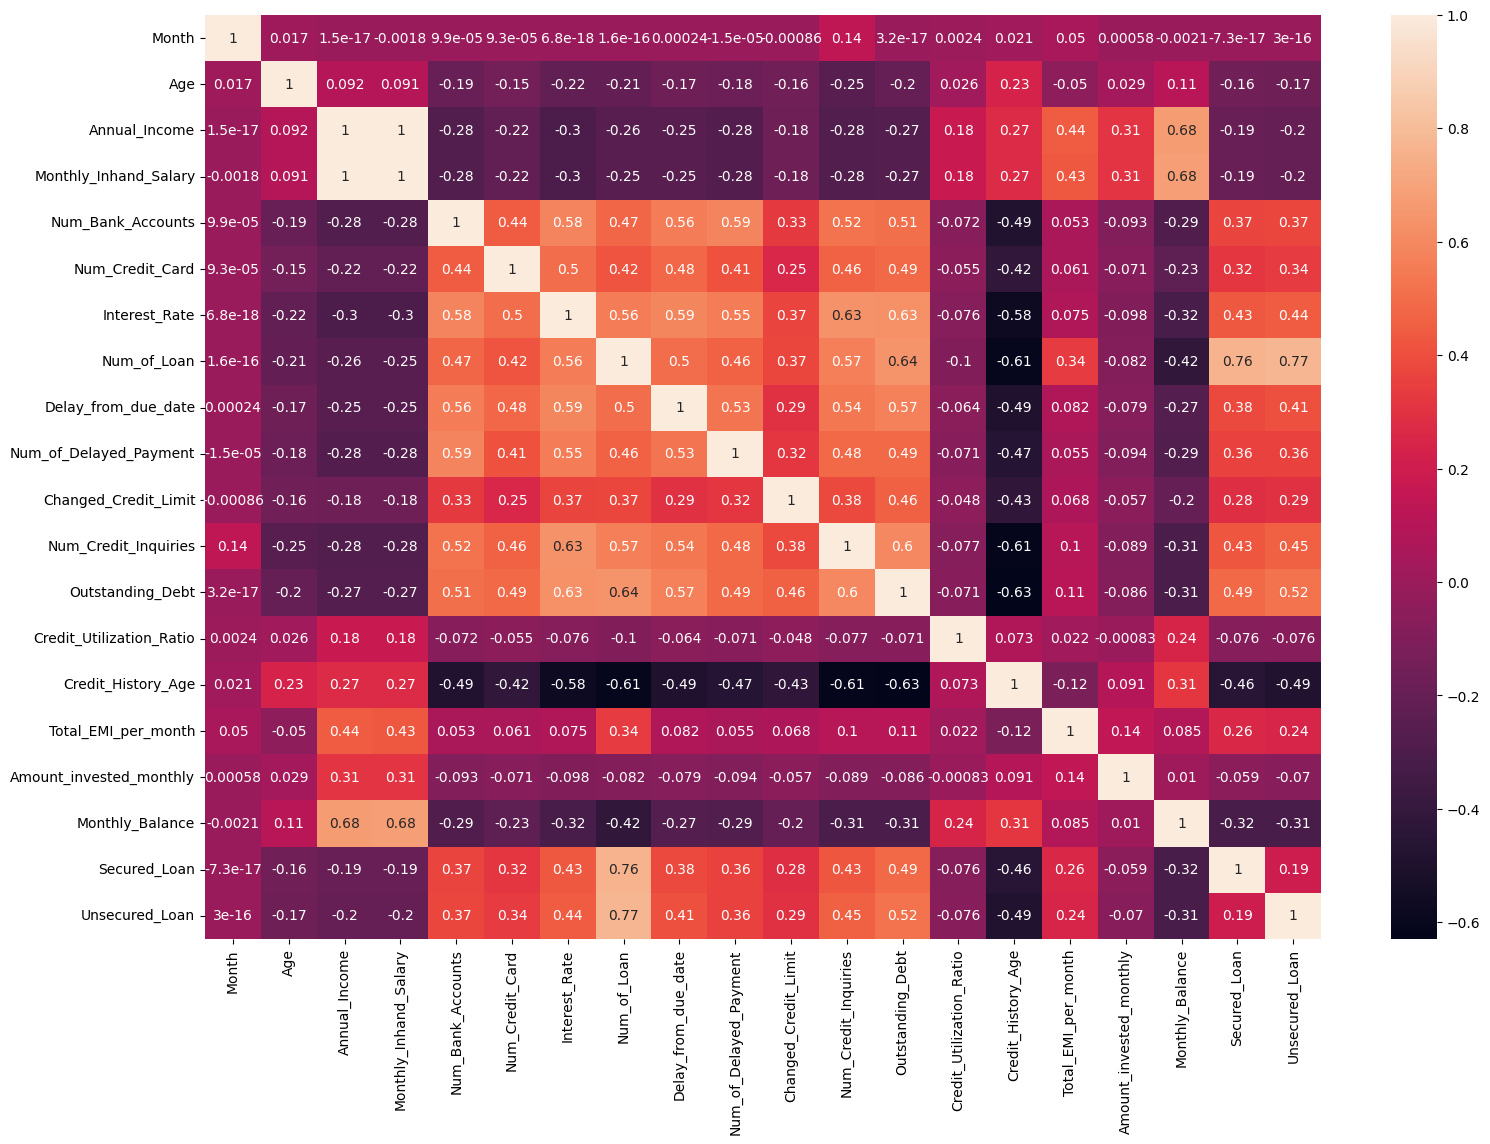

In [ ]:
plt.subplots(figsize=(18,12))
df_num=df.select_dtypes(include='number')
sns.heatmap(df_num.corr(),annot=True)
plt.show()

<Figure size 100x1800 with 0 Axes>

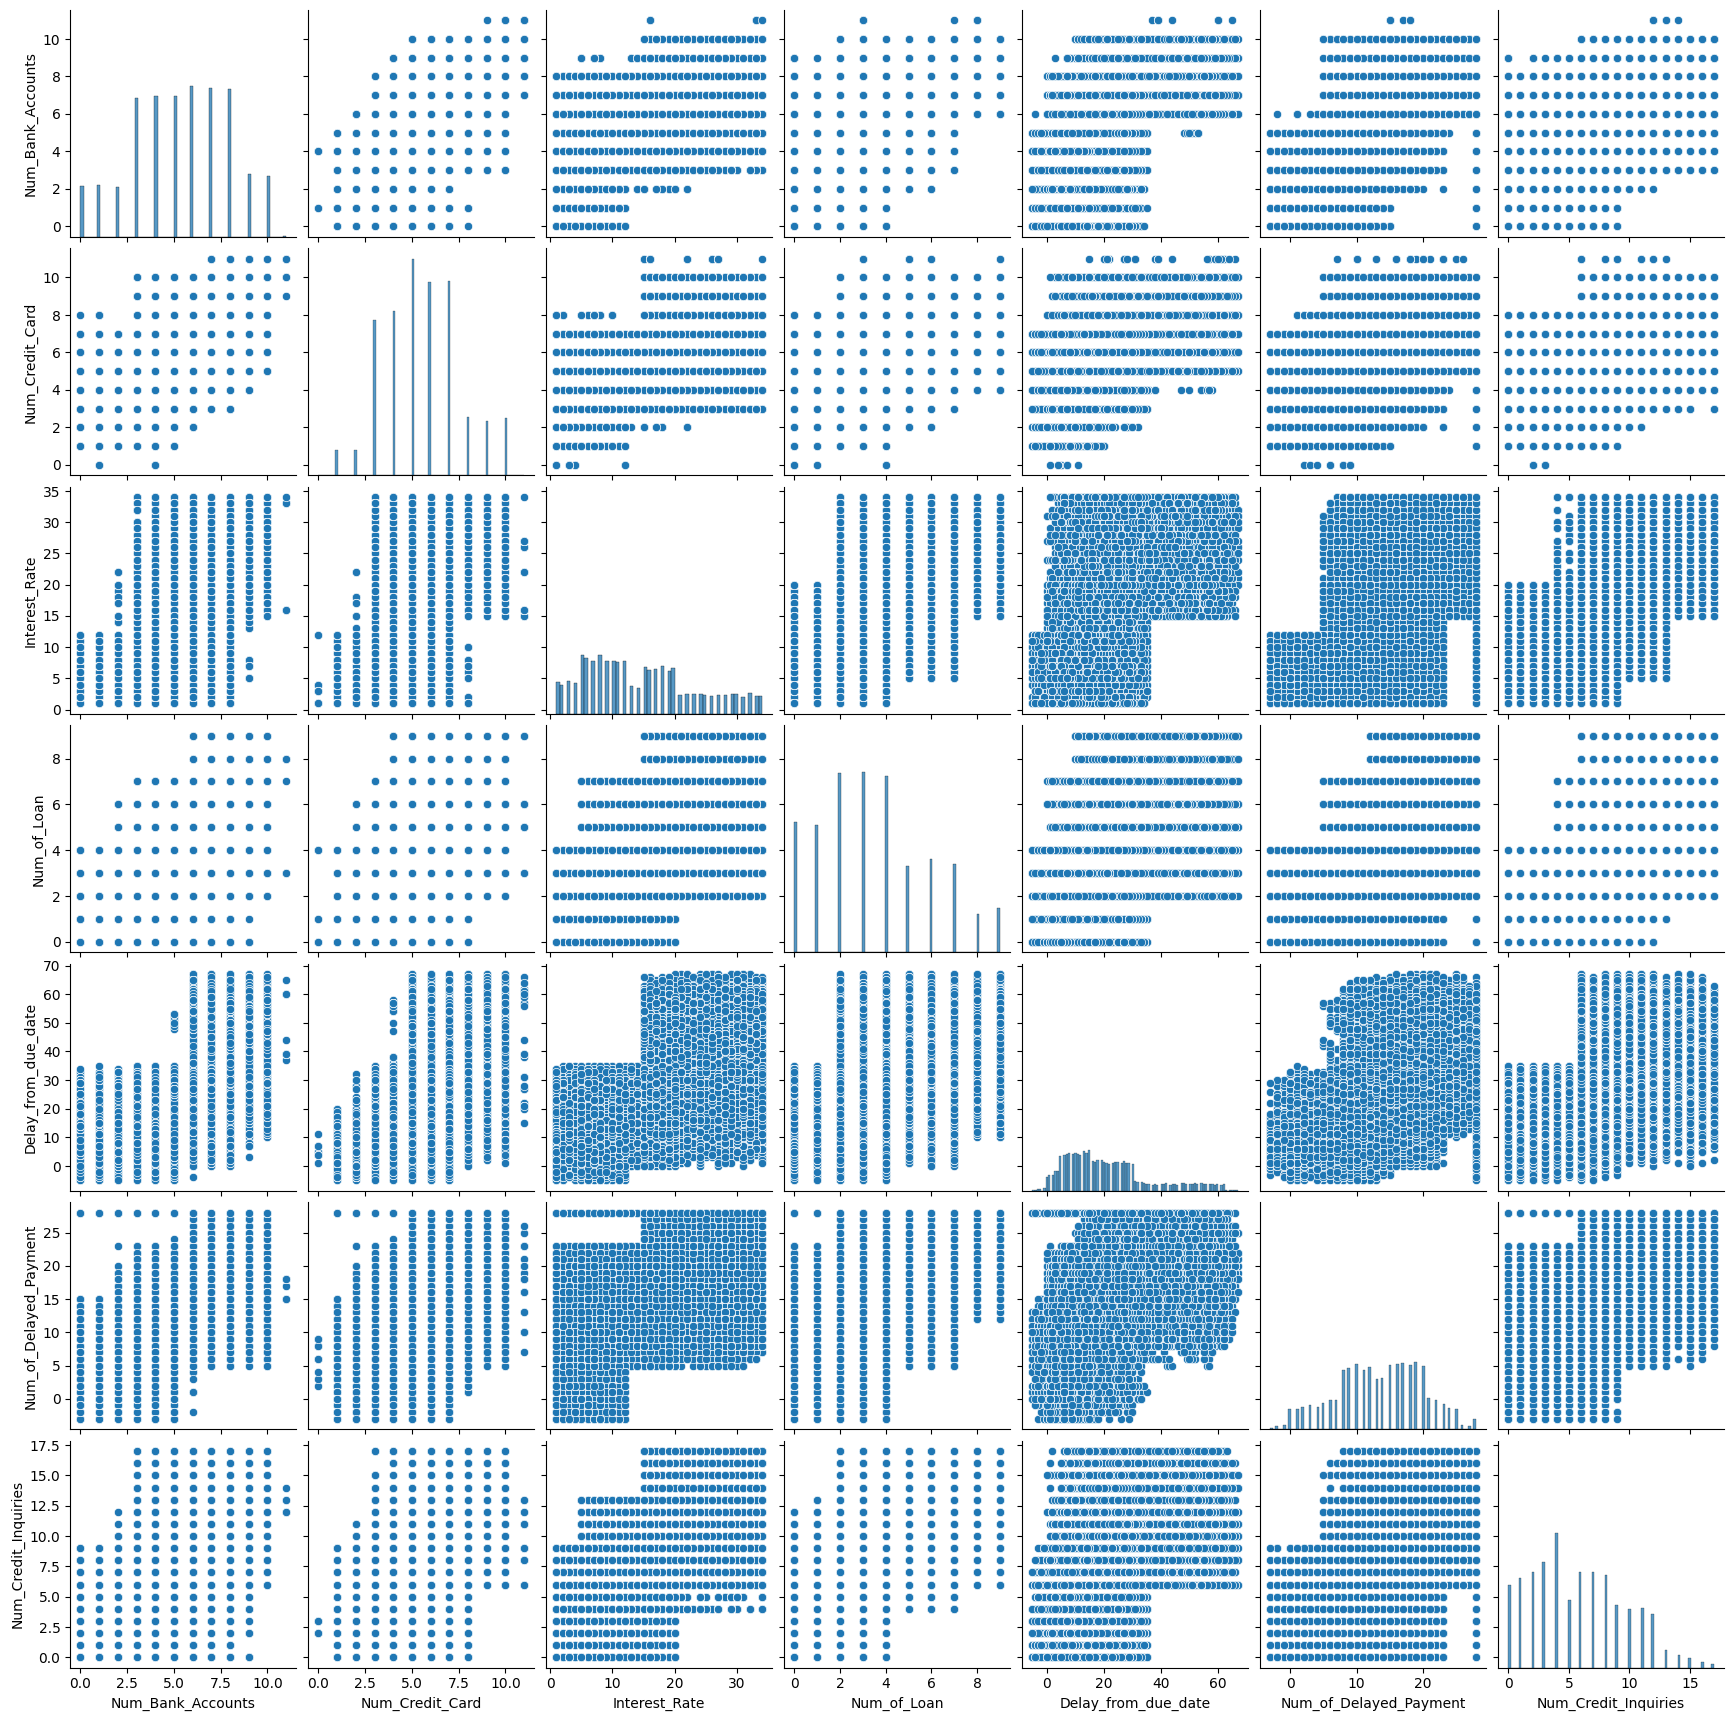

In [ ]:
plt.figure(figsize=(1,18))
sns.pairplot(df[['Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Num_Credit_Inquiries']])
plt.show()

 Many of the columns like `Num_Bank_Accounts`, `Num_Credit_Card`, `Interest_Rate`, `Num_of_Loan`, `Delay_from_due_date`, `Num_of_Delayed_Payment`, `Num_Credit_Inquiries` are correlated with each other as heavy increase in one results in increase in others too.

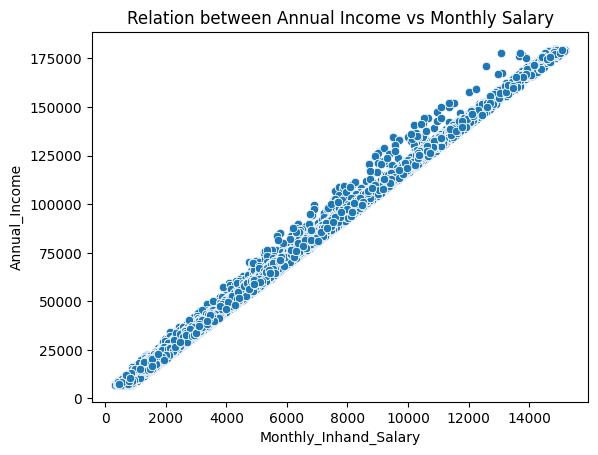

In [ ]:
plt.title('Relation between Annual Income vs Monthly Salary')
sns.scatterplot(x=df['Monthly_Inhand_Salary'],y=df['Annual_Income'])
plt.show()

- Annual Income and Monthly inhand salary is highly correlated to each other.

In [ ]:
(df['Num_of_Loan']==df['Secured_Loan']+df['Unsecured_Loan']).value_counts()

,count
True,88592
False,11408


As we can see num of loans are equal to our featured columns secured and unsecured loans but as we have already given the credit mix in dataset, these featured columns are not needed to find the credit mix.

# *FEATURE ENGINEERING*

Columns like `Id`, `Month`, `Name`, `Age` of the perosn , `SSN` of customer , `Occupation` of the customer are not needed for further analysis.

`Type of Loan` is not needed as we already have credit mix which should be extracted from type of loan column.


In [ ]:
# Creating dictionary to aggregate data
diction={
         'Monthly_Inhand_Salary':'mean',
         'Num_Credit_Card':'max',
         'Num_of_Loan':'max',
         'Delay_from_due_date':'mean',
         'Num_of_Delayed_Payment':'mean',
         'Num_Credit_Inquiries':'mean',
         'Credit_Mix':'last',
         'Outstanding_Debt':'mean',
         'Credit_Utilization_Ratio':'mean',
         'Credit_History_Age':'last',
         'Total_EMI_per_month':'last',
         }

In [ ]:
# Aggregating data
df_agg=df.groupby('Customer_ID').agg(diction).reset_index()
df_agg.shape

(12500, 12)

In [ ]:
# Encoding Credit Mix column to Numeric
score_cm={'Good':2,'Standard':1,'Bad':0}
df['Credit_Mix']=df['Credit_Mix'].replace(score_cm)
df_agg['Credit_Mix']=df_agg['Credit_Mix'].replace(score_cm)
df_agg['Credit_Mix'].value_counts(normalize=True)

,proportion
Credit_Mix,
0.5,0.45848
1.0,0.30384
0.0,0.23768


## *DEBT TO INCOME RATIO*
The **debt-to-income (DTI)** ratio is a financial metric that compares a person’s total monthly debt payments to their gross monthly income. It is typically expressed as a percentage. Here’s how it’s calculated and how it can impact a credit score:

Calculating the Debt-to-Income Ratio
Formula:

**DTI Ratio**
=
Total Monthly Debt Payments/
Gross Monthly Income
×
100
<br>

Components:

**Total Monthly Debt Payments**: This includes all monthly debt obligations like mortgage or rent, credit card payments, car loans, student loans, and any other recurring debt payments.<br>
**Gross Monthly Income**: This is the total income before taxes and other deductions.<br>
**Impact on Credit Score**<br>

- A lower DTI ratio indicates that a person has a manageable level of debt relative to their income, which can be seen as a positive indicator of their ability to repay borrowed money. This can positively impact their credit score and improve their creditworthiness.
- A higher DTI ratio suggests that a person has a higher level of debt relative to their income, which may indicate a higher risk of default. This can negatively impact their credit score and make it harder to obtain new credit or loans.

In [ ]:
# creating Debt to income ratio
df_agg['DTI']=df_agg['Outstanding_Debt']/df_agg['Monthly_Inhand_Salary']*100
df_agg['Debt_ratio']=1/(1+df_agg['DTI'])
df_agg.drop(columns=['DTI','Outstanding_Debt'],inplace=True)

## *EMI TO INCOME RATIO*
The **EMI to Income Ratio** (Equated Monthly Installment to Income Ratio) is a financial metric used to assess the proportion of a borrower’s income that goes towards paying EMI (Equated Monthly Installment) obligations. It helps lenders and borrowers understand how much of an individual’s income is committed to debt repayments, which can impact financial stability and borrowing capacity.

Calculating the EMI to Income Ratio
Formula:

**EMI to Income Ratio**
= Total EMI Payments/
Gross Monthly Income
×
100


Components:

**Total EMI Payments**: The total amount of monthly EMI payments for all loans (including personal loans, mortgages, car loans, etc.).<br>
**Gross Monthly Income**: The total income before taxes and deductions.

Impact on Credit Score:
- Higher Ratios: If you
r EMI to Income Ratio is high, it indicates that a significant portion of your income is dedicated to debt repayments. This can be seen as a higher financial risk by lenders and may negatively affect your credit score. A high ratio suggests you might be over-leveraged, making it harder to handle additional debt or unexpected expenses.
- Lower Ratios: A lower EMI to Income Ratio indicates a more manageable level of debt relative to your income. This is viewed positively by lenders as it suggests you have a better balance between debt and income, which can enhance your creditworthiness.


In [ ]:
df_agg['EIR']=df_agg['Total_EMI_per_month']/df_agg['Monthly_Inhand_Salary']*100
df_agg['EMI_ratio']=1/(1+df_agg['EIR'])
df_agg.drop(columns='EIR',inplace=True)

In [ ]:
df_agg['Amount_owed']=(df_agg['EMI_ratio']+df_agg['Debt_ratio'])/2
df_agg.drop(columns=['EMI_ratio','Debt_ratio','Total_EMI_per_month','Monthly_Inhand_Salary'],inplace=True)

## *CREDIT UTILIZATION RATIO*

The **Credit utilization ratio** is a key component of credit scoring and measures how much of your available credit you are using. It’s an important factor because it reflects your credit management habits and can impact your credit score. Credit utilization is a significant factor in credit scoring models, often accounting for about 30% of your credit score. A lower credit utilization ratio is generally seen as a positive indicator of creditworthiness. Here’s a detailed look at it:

Calculating the Credit Utilization Ratio Formula:

**Credit Utilization Ratio** = Total Credit Card Balances/
Total Credit Limit
×
100<br>

Components:

**Total Credit Card Balances**: This is the sum of all outstanding balances on your credit cards.<br>
**Total Credit Limits**: This is the sum of all your credit card limits.

**Impact on Credit Score**

- Low Utilization Ratio: Using a small percentage of your available credit (e.g., below 30%) indicates that you are managing credit responsibly. It can positively affect your credit score.
- High Utilization Ratio: Using a high percentage of your available credit (e.g., above 30% or 50%) can suggest financial stress and may negatively impact your credit score.


In [ ]:
df_agg['Credit_Utilization_Ratio']=1/(1+df_agg['Credit_Utilization_Ratio'])


## *PAYMENT HISTORY*
**Payment History** is the most significant factor in calculating your credit score, typically accounting for about 35% of your FICO score. It reflects your track record of making payments on time for credit accounts, including credit cards, loans, mortgages, and other credit obligations.

Components of Payment History<BR>
**On-Time Payments**: Regular and timely payments are crucial. Each on-time payment positively contributes to your credit score.<BR>
**Missed or Late Payments:**
**Frequency**: The number of missed payments and their frequency affect your score. Multiple missed payments are more detrimental.<BR>
**Severity**: Payments that are significantly overdue (e.g., 30 days, 60 days, 90 days) have a greater negative impact.<BR>
**Recency**: Recent missed payments have a more substantial effect than older ones.<BR>

Calculate On-Time Payment Ratio Formula:<br>
On-Time Payment Ratio
=
Number of On-Time Payments/
Total Number of Payments
×
100

**Impact on Credit Score**
- Positive Impact:

Consistent On-Time Payments: Having a history of consistent, on-time payments boosts your credit score, reflecting responsible credit management.
Long-Term History: A long history of on-time payments builds a strong credit profile.
- Negative Impact:

Missed Payments: Each missed or late payment can lower your credit score, especially if it becomes a pattern.
High Delinquency: Accounts in collections or serious delinquencies cause significant drops in your score.
Recent Issues: Recent missed payments or delinquencies have a more pronounced effect compared to older issues.

In [ ]:
df_agg['delay_payments']=df_agg['Delay_from_due_date']*df_agg['Num_of_Delayed_Payment']/30
df_agg['total_payments']=(df_agg['Num_of_Loan']+df_agg['Num_Credit_Card'])*8

In [ ]:
df_agg['Payment_History']=((df_agg['total_payments']-df_agg['delay_payments'])/df_agg['total_payments'])
df_agg.drop(columns=['delay_payments','total_payments','Delay_from_due_date','Num_of_Delayed_Payment','Num_of_Loan','Num_Credit_Card'],inplace=True)

## *CREDIT MIX RATIO*
The **Credit Mix Ratio** is a component of credit scoring that reflects the diversity of a borrower’s credit accounts. It measures the variety of credit types a person has, which can influence their credit score. A well-balanced credit mix typically includes a combination of different types of credit accounts.

Components of Credit Mix
Revolving Accounts:

**Credit Cards**: These accounts allow for borrowing up to a credit limit and paying off balances over time.<br>
**Lines of Credit**: Includes personal lines of credit or home equity lines of credit.<br>
**Installment Accounts**:<br>
**Loans:** Includes auto loans, student loans, and personal loans, which have fixed payments over a specified term.<br>
**Mortgages:** Long-term loans used to purchase real estate.

Calculating the Credit Mix Ratio:

While there isn't a single formula for the Credit Mix Ratio, you can evaluate the balance of different types of credit accounts in your credit profile. Here’s a simplified way to assess your credit mix:

Identify Account Types: List all the types of credit accounts you have (e.g., credit cards, auto loans, mortgages).
Calculate Proportions:
Calculate the proportion of each type of credit in your total credit portfolio.<br>
**Credit Mix Ratio**
=
Number of Accounts of Each Type
Total Number of Credit Accounts
×
100

**Assess Diversity:**

A diverse mix includes a balance of different credit types. For example, having both revolving credit (credit cards) and installment loans (auto loans) can be beneficial.

In [ ]:
df_agg['Credit_Mix']=df_agg['Credit_Mix']/2  # to put the values in the range of 0 to 1

## *LENGTH OF CREDIT HISTORY*
**Credit History Age** is a component of your credit score that reflects the length of time you’ve had credit accounts open. It plays a crucial role in determining your creditworthiness, with a typical weight of around 15% in FICO credit scoring models.

Average Age of Credit Accounts Formula:
<br>Average Age of Credit Accounts
=
Sum of All Account Ages/
Number of Credit Accounts
​

Components:<br>
**Sum of All Account Ages**: The total age of each credit account from the date it was opened until now.<br>
**Number of Credit Accounts**: The total number of credit accounts you have.<br>
**Age of Oldest Account**:
This is the age of the oldest active credit account on your credit report. A longer age can positively impact your credit score.<br>
**Age of Newest Account:**
This refers to the age of your most recent credit account. A new account reduces the average age of your credit history.<br><br>
**Impact on Credit Score**
- Positive Impact:

  Longer Credit History: A longer credit history is generally favorable. It demonstrates a track record of responsible credit management.<br>
  Old Accounts: Keeping old accounts open contributes to a higher average age of accounts, which positively affects your credit score.
- Negative Impact:

  Recent Accounts: Opening new accounts reduces the average age of your credit accounts and can temporarily lower your credit score.<br>
  Short Credit History: A shorter credit history can negatively impact your score because there’s less information available about your credit management over time.

In [ ]:
df_agg['Credit_History_Age']=df_agg['Credit_History_Age']/50
# I am assuming that 50 is the best age for credit history as it cant be more than that for individuals

## *NEW CREDIT*
**New Credit** is one of the factors considered in credit scoring models, typically accounting for around 10% of your FICO credit score. This component assesses how new credit accounts and recent credit inquiries affect your overall credit profile. Here’s a detailed look at how new credit impacts your credit score:

Components of New Credit:<br>
**Recent Credit Inquiries** means the number of hard inquiries on your credit report due to recent credit applications.
<br>
**Newly Opened Credit Accounts** tracks the number of new credit accounts opened recently.

**Average Age of New Credit Accounts:** reflects the age of your most recent credit accounts.

**Impact on Credit Score**
- When you apply for new credit, the associated hard inquiry and the opening of a new account can cause a minor, temporary drop in your credit score.
- As long as you manage your new credit accounts responsibly—making timely payments and keeping balances low—the impact of the initial drop will diminish over time. Your score can recover and potentially improve as the new accounts build a positive payment history.

In [ ]:
# As only num of credit enquiry is given to us, I am using that to get new_credit
df_agg['New_Credit']=1/(1+df_agg['Num_Credit_Inquiries'])
df_agg.drop('Num_Credit_Inquiries',axis=1,inplace=True)

## *PAYMENT BEHAVIOUR*
Payment behavior significantly impacts your credit score. Here's how various aspects of payment behavior influence your credit score:

**Timeliness of Payments**
On-Time Payments: Regularly making payments on time positively affects your credit score. On-time payments demonstrate reliability and contribute positively to your credit history.
Late Payments: Missing payments or paying late can have a negative impact. Late payments are reported to credit bureaus and can significantly lower your credit score. The impact can be more severe if payments are 30 days or more overdue.<br>
**Payment Amount**
- Minimum Payments: Paying only the minimum required amount on credit cards or loans may not negatively impact your credit score directly, but it can result in higher interest charges and potentially slower debt reduction.
- Full Payments: Paying off the full balance each month is ideal, especially for credit cards, as it avoids interest charges and demonstrates strong financial management.<br>

**Behaviour towards spending and paying installments**
- High_spent_Medium_value_payments: High-value purchases with small payments toward the balance.
Impact:
If the credit utilization remains high due to high spending and only small payments are made, it can negatively impact your credit score. High balances relative to credit limits can lower your score.
- Low_Spent_Medium_Value_Payments: Making low-value purchases and paying small amounts towards the balance.
Impact:
If payments are timely and balances remain low, this behavior is likely to have a neutral or slightly positive impact on your credit score but If small payments lead to balances being carried over and high credit utilization, it may negatively impact the score. Additionally, making only minimum payments might lead to higher interest charges and slower debt reduction.
- High_Spent_Large_Value_Payments: Making high-value purchases and paying large amounts towards the balance.
Impact:
Regularly making large payments on high balances can positively impact your credit score, especially if it reduces credit utilization and payments are made on time.
- Low_Spent_Large_Value_Payments: Making low-value purchases but paying large amounts towards the balance.
Impact:
This behavior is generally positive for credit scores if it keeps the balance low and payments are timely, reflecting good credit management.
- High_Spent_Small_Payments: Making high-value purchases and only making minimum payments.
Impact:
This behavior can significantly impact your credit score negatively due to high credit utilization and potential accumulation of debt. Consistently making only minimum payments can lead to higher interest charges and increased debt over time.
- Low_Spent_Small_Payments: Making low-value purchases and only making minimum payments.
Impact:
If credit utilization is low and payments are timely, this behavior may have a neutral to positive impact on the credit score. But regularly making only minimum payments might slow debt reduction and could eventually lead to higher overall interest costs, impacting the credit score negatively if balances are carried over.

In [ ]:
# Encoding payment behaviour to numeric
pymnt_dict={'High_spent_Small_value_payments':1,
            'Low_spent_Small_value_payments':2,
            "High_spent_Medium_value_payments":3,
            "High_spent_Large_value_payments":4,
            "Low_spent_Medium_value_payments":5,
            "Low_spent_Large_value_payments":6,
            'Unknown':1}
df['Payment_Behaviour']=df['Payment_Behaviour'].replace(pymnt_dict)
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
2,27489
3,18911
4,14911
5,14414
1,13507
6,10768


In [ ]:
# encoding payment of min amount to numeric
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].replace({'No':0,'Yes':1,'NM':0})
df['Payment_of_Min_Amount'].value_counts()
# assuming NM as not mentioned payments are not paid payments

,count
Payment_of_Min_Amount,
1,52326
0,47674


Taking the payment behaviuor of last 3 month based on recency only for calculating credit score.

In [ ]:
df_3mnth=df[df['Month']>=6]
df_agg['pymnt_behav_3month']=df_3mnth.groupby('Customer_ID')['Payment_Behaviour'].mean().values
df_agg['pymnt_behav_3month']=df_agg['pymnt_behav_3month'].round()

In [ ]:
df_agg['pymn_min_amnt']=df_3mnth.groupby('Customer_ID')['Payment_of_Min_Amount'].mean().values
df_agg['pymn_min_amnt']=df_agg['pymn_min_amnt'].round()

In [ ]:
df_agg['pymnt_behaviour']=(df_agg['pymnt_behav_3month']+df_agg['pymn_min_amnt']*6)/12
df_agg.drop(columns=['pymnt_behav_3month','pymn_min_amnt'],inplace=True)

In [ ]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               12500 non-null  object 
 1   Credit_Mix                12500 non-null  float64
 2   Credit_Utilization_Ratio  12500 non-null  float64
 3   Credit_History_Age        12500 non-null  float64
 4   Amount_owed               12500 non-null  float64
 5   Payment_History           12500 non-null  float64
 6   New_Credit                12500 non-null  float64
 7   pymnt_behaviour           12500 non-null  float64
 8   Credit_Score              4686 non-null   float64
dtypes: float64(8), object(1)
memory usage: 879.0+ KB


# *CREDIT SCORE*
● A numerical representation of creditworthiness, reflecting credit history and financial behavior.<br> ● It's used by lenders, landlords, and others toassess the risk of lending money or extending credit to an individual.<br>
● The score reflects the individual's credit history and financial behavior. It generally ranges from 300 to 850, with higher scores indicating better creditworthiness.<br>
●Different credit scoring models may weigh different factors slightly differently, but these are the general guidelines. Maintaining good credit habits, like paying bills on time, managing debt responsibly, and keeping older accounts open, can help improve and maintain a high credit score.

## Customizing Credit Score
<br>
Assigning different weights to the features
`Amount Owed` : 15% <br>
`Credit Utilization Ratio` : 20% <br>
`Payent History`: 20% <br>
`Credit Mix`: 10% <br>
`Length of Credit History` 20% :<br>
`New Credit` : 10% <br>
`Payment Behaviour` : 5% <br>

Assuming Credit Score Range is 200-850


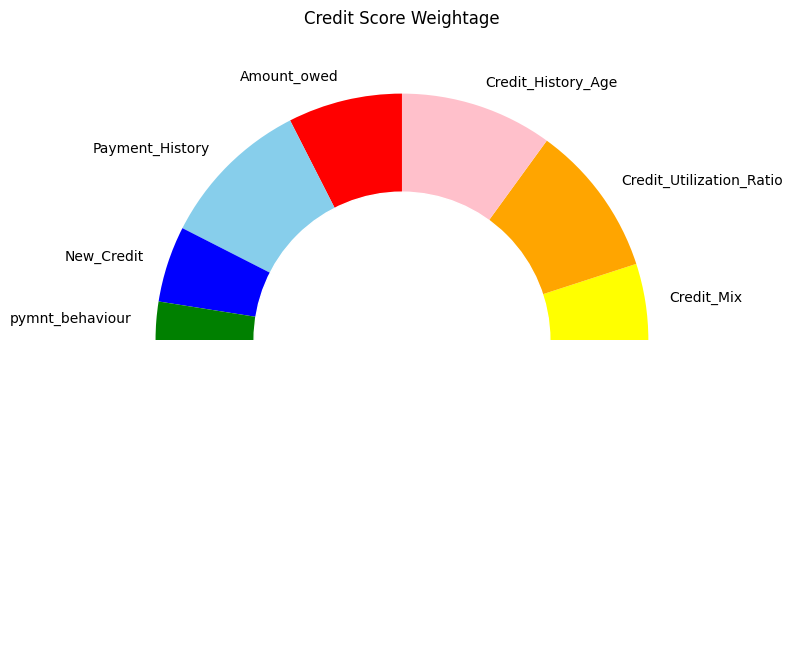

In [ ]:
import matplotlib.pyplot as plt

label = ['Credit_Mix', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Amount_owed', 'Payment_History', 'New_Credit',
       'pymnt_behaviour',""]
val = [1,2,2,1.5,2,1,0.5]

val.append(sum(val))  # 50% blank
colors = ['yellow','orange','pink','red','skyblue','blue', 'green', 'white']

# plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.pie(val, labels=label, colors=colors)
ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.title('Credit Score Weightage')
fig.show()

In [ ]:
# finding credit score
df_agg['Credit_Score']=df_agg['Amount_owed']*0.15+df_agg['Credit_Utilization_Ratio']*0.2+df_agg['Payment_History']*0.2+df_agg['Credit_Mix']*0.1\
+df_agg['Credit_History_Age']*0.2+df_agg['New_Credit']*0.1+df_agg['pymnt_behaviour']*0.05

In [ ]:
# putting score in required range
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(200,850))
df_agg['Credit_Score']=scaler.fit_transform(df_agg[['Credit_Score']]).round()
df_agg.head()

,Customer_ID,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Amount_owed,Payment_History,New_Credit,pymnt_behaviour,Credit_Score
0,CUS_0x1000,0.0,0.029004,0.2150,0.201800,0.073661,0.084211,0.666667,200.0
1,CUS_0x1009,0.5,0.032425,0.6200,0.227540,0.935807,0.250000,0.750000,611.0
2,CUS_0x100b,1.0,0.027901,0.3166,0.542417,0.896289,0.363636,0.250000,629.0
3,CUS_0x1011,0.5,0.034897,0.3166,0.197968,0.730339,0.125000,0.833333,468.0
4,CUS_0x1013,1.0,0.030364,0.3566,0.159729,0.926215,0.250000,0.333333,566.0


In [ ]:
# customer with hoghest credit score
high_score_cust=df_agg[df_agg['Credit_Score']==df_agg['Credit_Score'].max()]['Customer_ID'].values[0]
df[df['Customer_ID']==high_score_cust]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Secured_Loan,Unsecured_Loan
97152,0x24f42,CUS_0x16ee,1,Tom Berginw,48,538-37-5854,Developer,115476.12,9851.01,1,...,162.9,31.420136,31.08,0,0.0,191.607116,3,1043.493884,0,1
97153,0x24f43,CUS_0x16ee,2,Tom Berginw,48,538-37-5854,Developer,115476.12,9851.01,1,...,162.9,43.099808,31.17,0,0.0,1626.957143,1,1049.160037,0,1
97154,0x24f44,CUS_0x16ee,3,Tom Berginw,48,538-37-5854,Developer,115476.12,9851.01,1,...,162.9,43.713560,31.25,0,0.0,121.065040,3,1114.035960,0,1
97155,0x24f45,CUS_0x16ee,4,Tom Berginw,48,538-37-5854,Developer,115476.12,9851.01,1,...,162.9,27.983559,31.33,0,0.0,274.724269,5,990.376731,0,1
97156,0x24f46,CUS_0x16ee,5,Tom Berginw,48,538-37-5854,Developer,115476.12,9851.01,1,...,162.9,43.914987,31.42,0,0.0,112.926038,4,1112.174962,0,1
97157,0x24f47,CUS_0x16ee,6,Tom Berginw,48,538-37-5854,Developer,115476.12,9851.01,1,...,162.9,38.629407,31.50,0,0.0,548.006049,6,707.094951,0,1
97158,0x24f48,CUS_0x16ee,7,Tom Berginw,48,538-37-5854,Developer,115476.12,9851.01,1,...,162.9,36.328404,31.58,0,0.0,260.972466,5,1004.128534,0,1
97159,0x24f49,CUS_0x16ee,8,Tom Berginw,48,538-37-5854,Developer,115476.12,9851.01,1,...,162.9,36.591399,31.67,0,0.0,1626.957143,3,715.965489,0,1


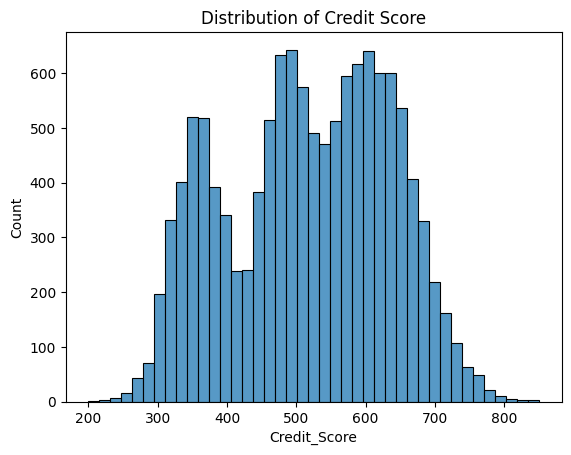

In [ ]:
# checking credit score distribution
plt.title('Distribution of Credit Score')
sns.histplot(df_agg['Credit_Score'])
plt.show()

In [ ]:
agg_dict={'Age':'last',
          'Occupation':'last',
          'Annual_Income':'mean',
          'Monthly_Inhand_Salary':'mean',
          'Num_Bank_Accounts':'last',
          'Num_Credit_Card':'mean',
          'Interest_Rate':'mean',
          'Num_of_Loan':'last',
          'Delay_from_due_date':'mean',
          'Num_of_Delayed_Payment':'mean',
          'Changed_Credit_Limit':'mean',
          'Num_Credit_Inquiries':'mean',
          'Credit_Mix':'mean',
          'Outstanding_Debt':'mean',
          'Credit_Utilization_Ratio':'mean',
          'Credit_History_Age':'last',
          'Payment_of_Min_Amount':'mean',
          'Total_EMI_per_month':'mean',
          'Amount_invested_monthly':'mean',
          'Payment_Behaviour':'mean',
          'Amount_invested_monthly':'mean',
          'Payment_Behaviour':'mean',
          'Monthly_Balance':'mean'
}

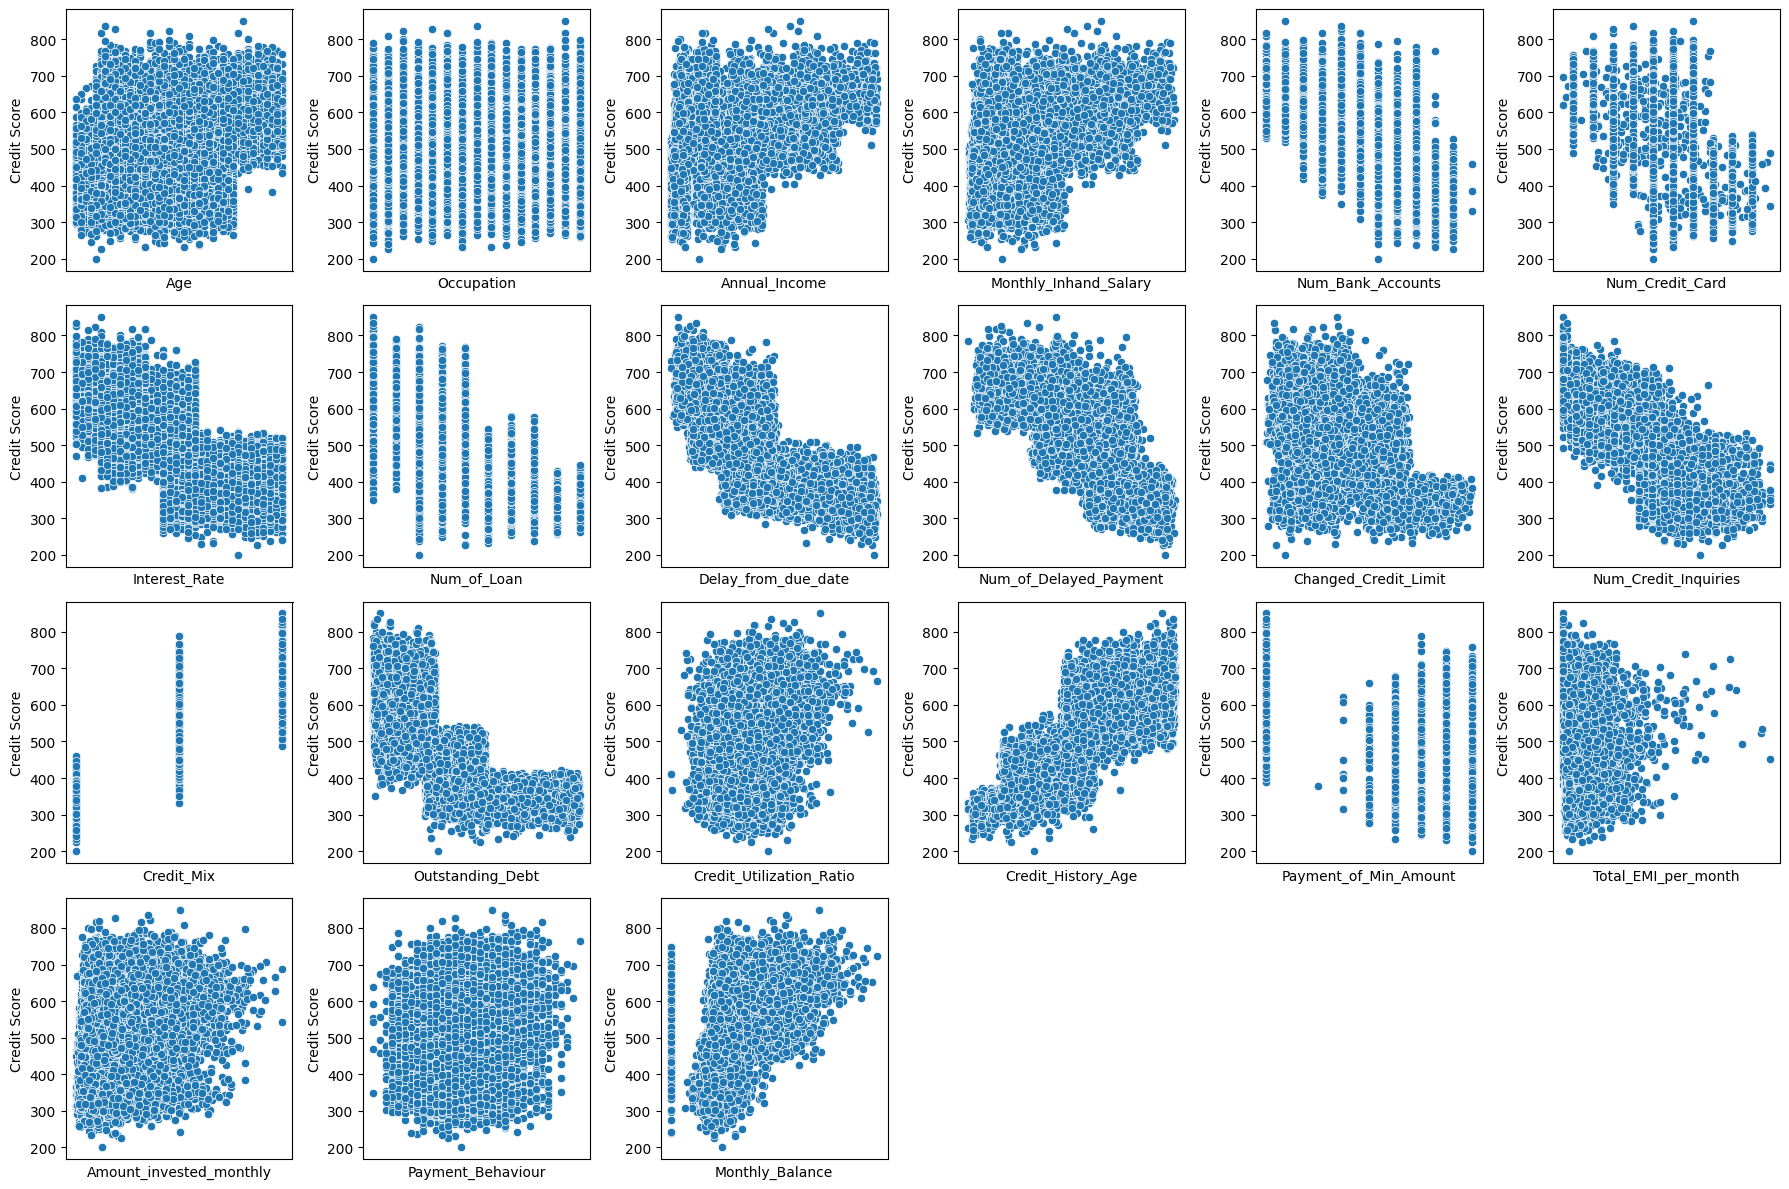

In [ ]:
plt.subplots(figsize=(18,12))
i=1
plt.title('Relation between Features and Credit Score')
for col in df_new.columns[1:]:
    plt.subplot(4,6,i)
    i+=1
    sns.scatterplot(x=df_new[col],y=df_agg['Credit_Score'])
    ax = plt.gca()

    ax.set_xticks([])      # removing xticks

    plt.ylabel('Credit Score')
    plt.tight_layout()

plt.show()

# *ANALYSIS AND INSIGHTS*
- If number of loans are high, the outstanding amount will be high too.
- No of credit enquiries resulting into high interest rates and same for number of loans and num of credit cards.
- If number of bank accounts are more, it results into more credit cards too usually.
- EDA Analysis are written during codes and visuals too.
- Credit score features are explained in detail above.
- Older individuals tend to have higher credit scores.
- Occupation doesnt have any effect on credit Score.
- Higher Annual Income or Monthly salary results in higher Credit Score.
- Number of Loans, Credit cards, Bank A/c have negative relation with credit score, means if 1 increases others decrease.
- High interest rates led to decrease in Credit Score.
- If num of delays, delayed payments or num of credit enquiries increases, it leads to decrease in credit score.
- increase in credit mix and credit history age results in high credit score.
- Increase in outstanding Debt decreases Credit score.


# *RECOMMENDATIONS*

- Pay Bills on Time.
- Reduce Credit Card Balances.
- Avoid Opening Too Many New Accounts.
- Maintain a Healthy Credit Mix.
- Payment history can be weighted based on the months too by giving weightage to different months and taking average of them, though for the sake of simplicity I didnt used that.